# Manhattan and Q-Q plot

## Load gwaslab 

In [1]:
import sys
sys.path.insert(0,"/home/yunye/work/gwaslab/src")
import gwaslab as gl

## Load data into Sumstats Object

In [2]:
mysumstats = gl.Sumstats("t2d_bbj.txt.gz",
             snpid="SNP",
             chrom="CHR",
             pos="POS",
             ea="ALT",
             nea="REF",
             neaf="Frq",
             p="P",
             build="19",             
             verbose=False)
mysumstats.fix_chr(verbose=False)

In [3]:
mysumstats.data

SNPID  CHR        POS      EA NEA     EAF       P  \
0                 1:725932_G_A    1     725932       G   A  0.9960  0.5970   
1                 1:725933_A_G    1     725933       G   A  0.0040  0.5973   
2                 1:737801_T_C    1     737801       C   T  0.0051  0.6908   
3               1:749963_T_TAA    1     749963     TAA   T  0.8374  0.2846   
4                 1:751343_T_A    1     751343       T   A  0.8593  0.2705   
...                        ...  ...        ...     ...  ..     ...     ...   
12557756       X:154874837_A_G   23  154874837       G   A  0.7478  0.5840   
12557757  X:154875192_GTACTC_G   23  154875192  GTACTC   G  0.2525  0.5612   
12557758       X:154879115_A_G   23  154879115       G   A  0.7463  0.5646   
12557759       X:154880669_T_A   23  154880669       T   A  0.2558  0.5618   
12557760       X:154880917_C_T   23  154880917       C   T  0.2558  0.5570   

           STATUS  
0         1995999  
1         1995999  
2         1995999  
3         1995999  
4         1995999  
...           ...  
12557756  1995999  
12557757  1995999  
12557758  1995999  
12557759  1995999  
12557760  1995999  

[12557761 rows x 8 columns]

## Create Manhattan plot and QQ plot

Sat Feb  3 17:08:01 2024 Start to create MQQ plot...v3.4.38:
Sat Feb  3 17:08:01 2024  -Genomic coordinates version: 19...
Sat Feb  3 17:08:01 2024  -Genome-wide significance level to plot is set to 5e-08 ...
Sat Feb  3 17:08:01 2024  -Raw input contains 12557761 variants...
Sat Feb  3 17:08:01 2024  -MQQ plot layout mode is : mqq
Sat Feb  3 17:08:03 2024 Finished loading specified columns from the sumstats.
Sat Feb  3 17:08:03 2024 Start data conversion and sanity check:
Sat Feb  3 17:08:03 2024  -Removed 0 variants with nan in CHR or POS column ...
Sat Feb  3 17:08:28 2024  -Removed 0 variants with CHR <=0...
Sat Feb  3 17:08:29 2024  -Removed 0 variants with nan in P column ...
Sat Feb  3 17:08:29 2024  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Sat Feb  3 17:08:30 2024  -Sumstats P values are being converted to -log10(P)...
Sat Feb  3 17:08:31 2024  -Sanity check: 0 na/inf/-inf variants will be removed...
Sat Feb  3 17:08:32 2024  -C

(<Figure size 3000x1000 with 2 Axes>, <gwaslab.g_Log.Log at 0x7f2820f81ee0>)

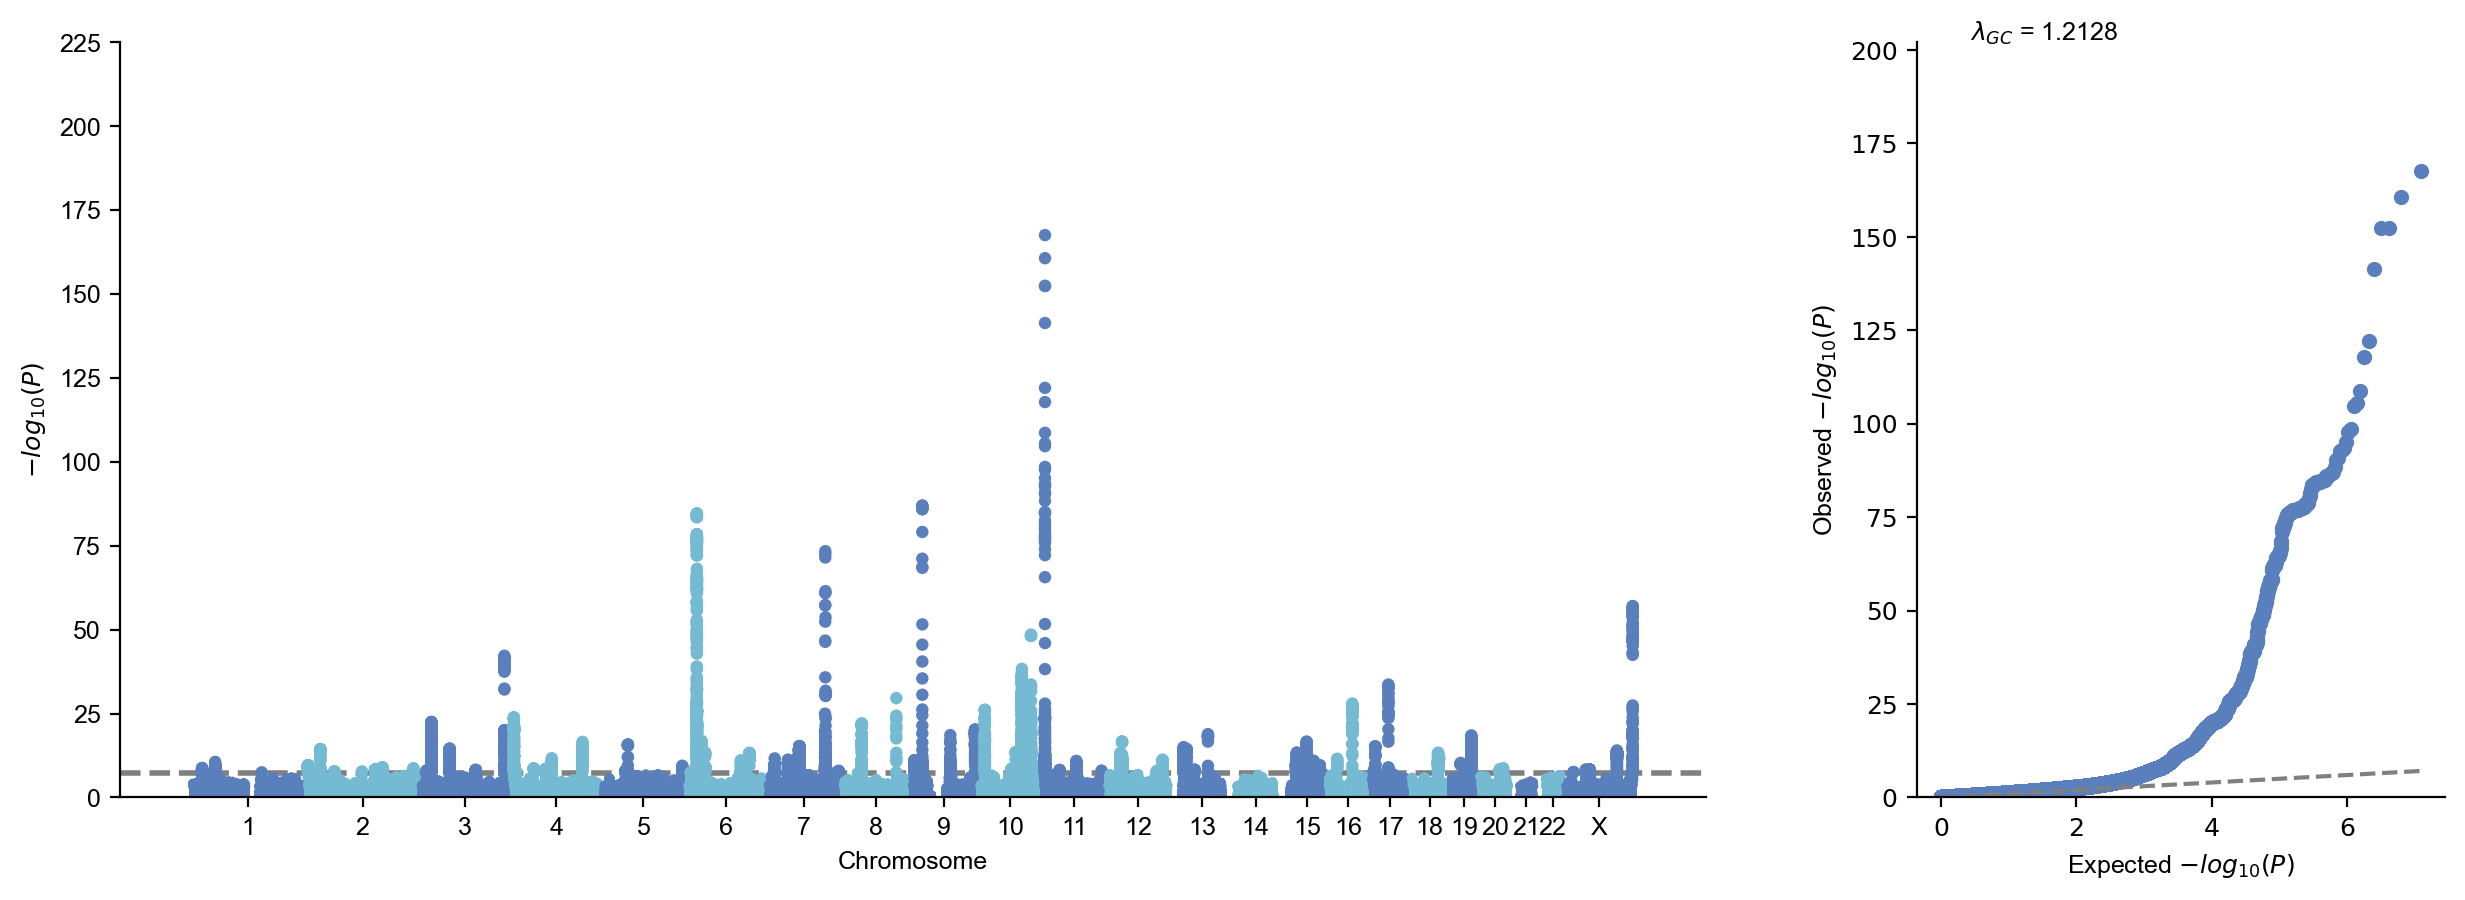

In [4]:
mysumstats.plot_mqq()

## gl.plot_mqq() Options

### Layout mode

If plotting all variants, it may take several minutes. You can use `skip` to skip variants with low MLOG10P in the plot. 

Note: use verbose=False to stop printing log and use check=False to skip sanity check for mqq plots

4 patterns of layout: 

- `mode= "mqq"` (default)
- `mode= "qqm"`
- `mode= "qq"` 
- `mode= "m"`

(<Figure size 3000x1000 with 2 Axes>, <gwaslab.g_Log.Log at 0x7f6928adce20>)

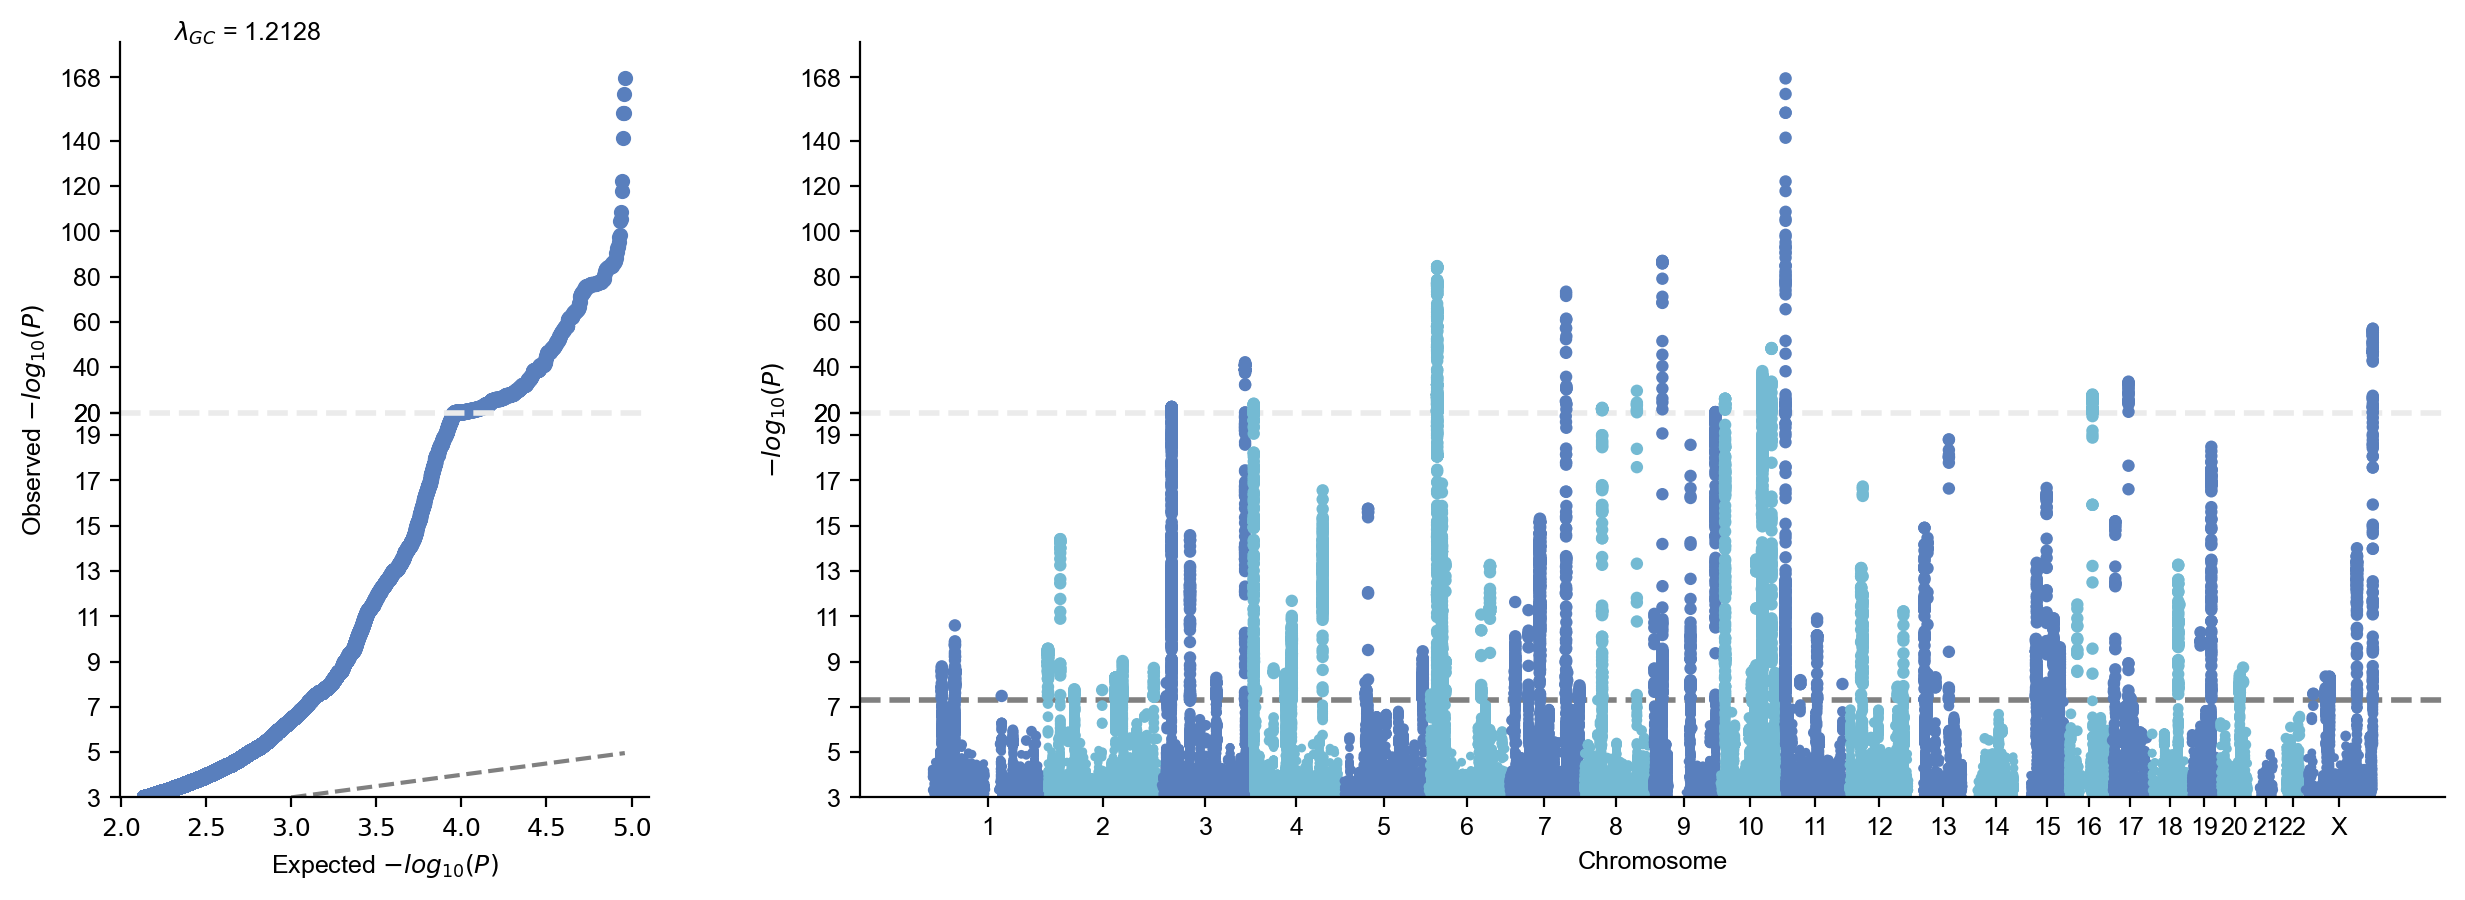

In [4]:
mysumstats.plot_mqq(skip=3,cut=20,mode="qqm",check=False, verbose=False)

(<Figure size 3000x1000 with 1 Axes>, <gwaslab.g_Log.Log at 0x7f6928adce20>)

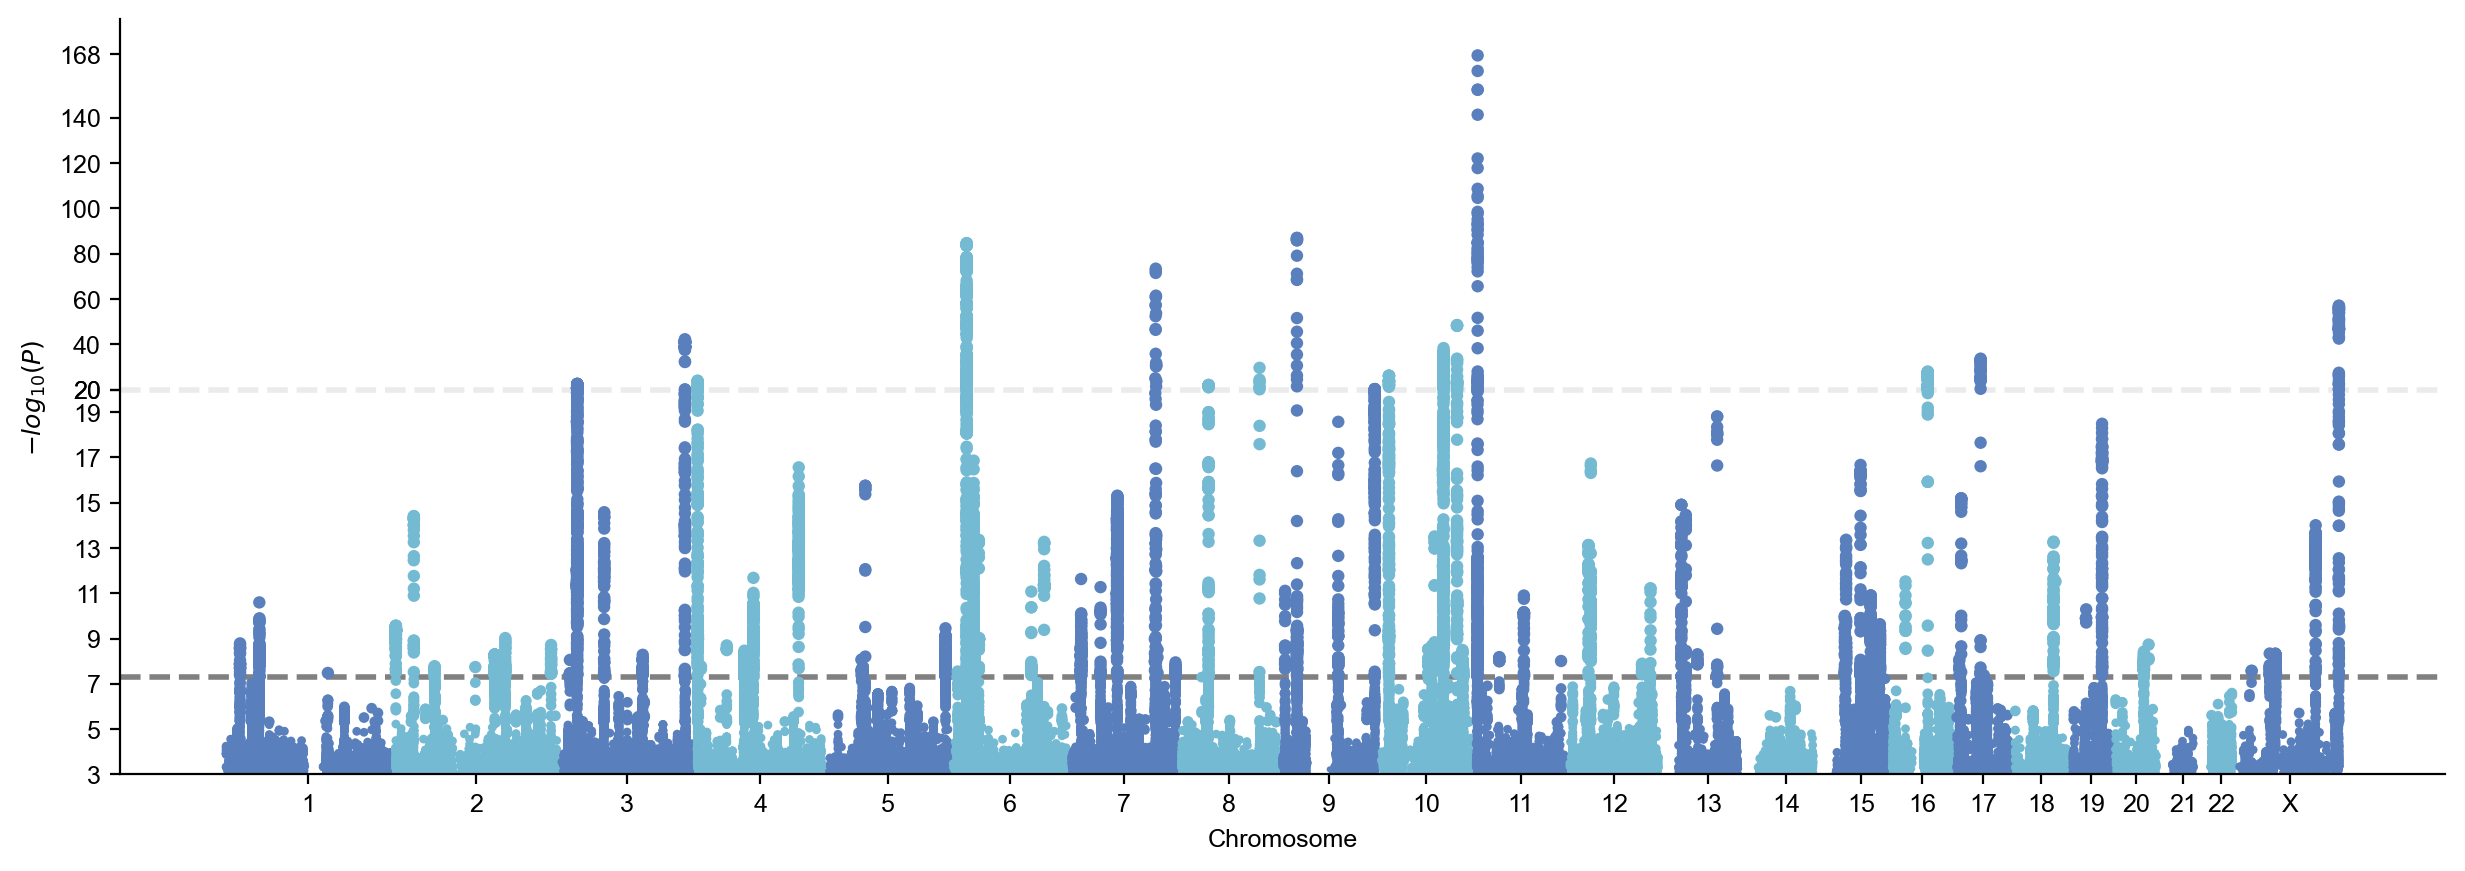

In [5]:
mysumstats.plot_mqq(skip=3,cut=20,mode="m",check=False,verbose=False)

(<Figure size 2000x2000 with 1 Axes>, <gwaslab.g_Log.Log at 0x7f6928adce20>)

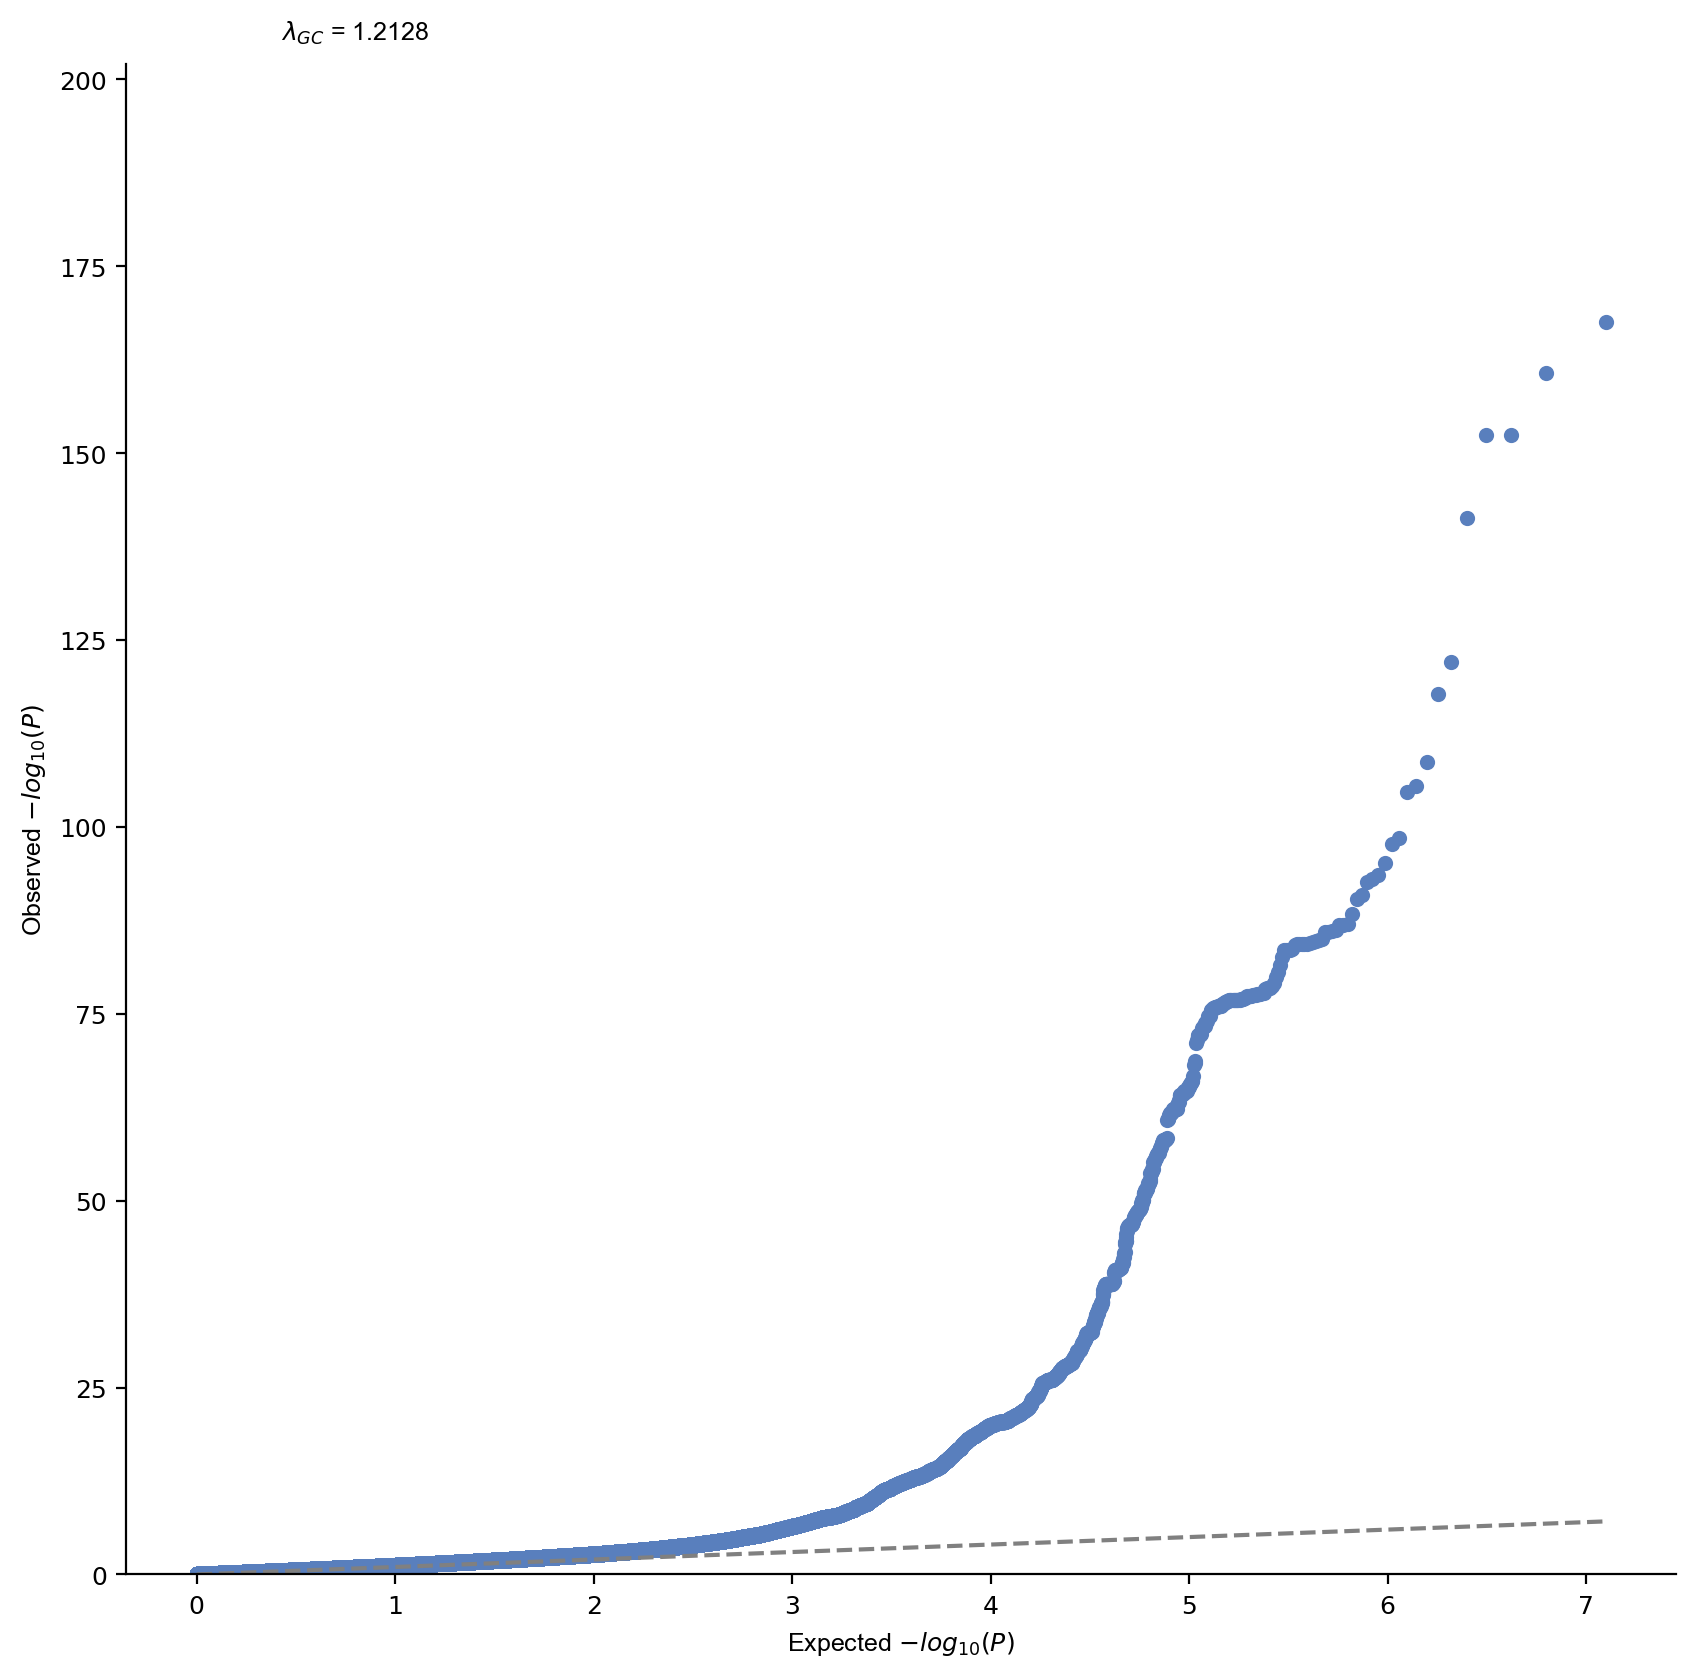

In [6]:
mysumstats.plot_mqq(mode="qq", fig_args= {"figsize":(10,10)},check=False,verbose=False)

### Y axis: Skip and Cut

- `skip` : skip the variants with low -log10(P) values for plotting
- `cut` : scale down the -log10(P) for variants above a certain threshold

(<Figure size 3000x1000 with 1 Axes>, <gwaslab.g_Log.Log at 0x7f6928adce20>)

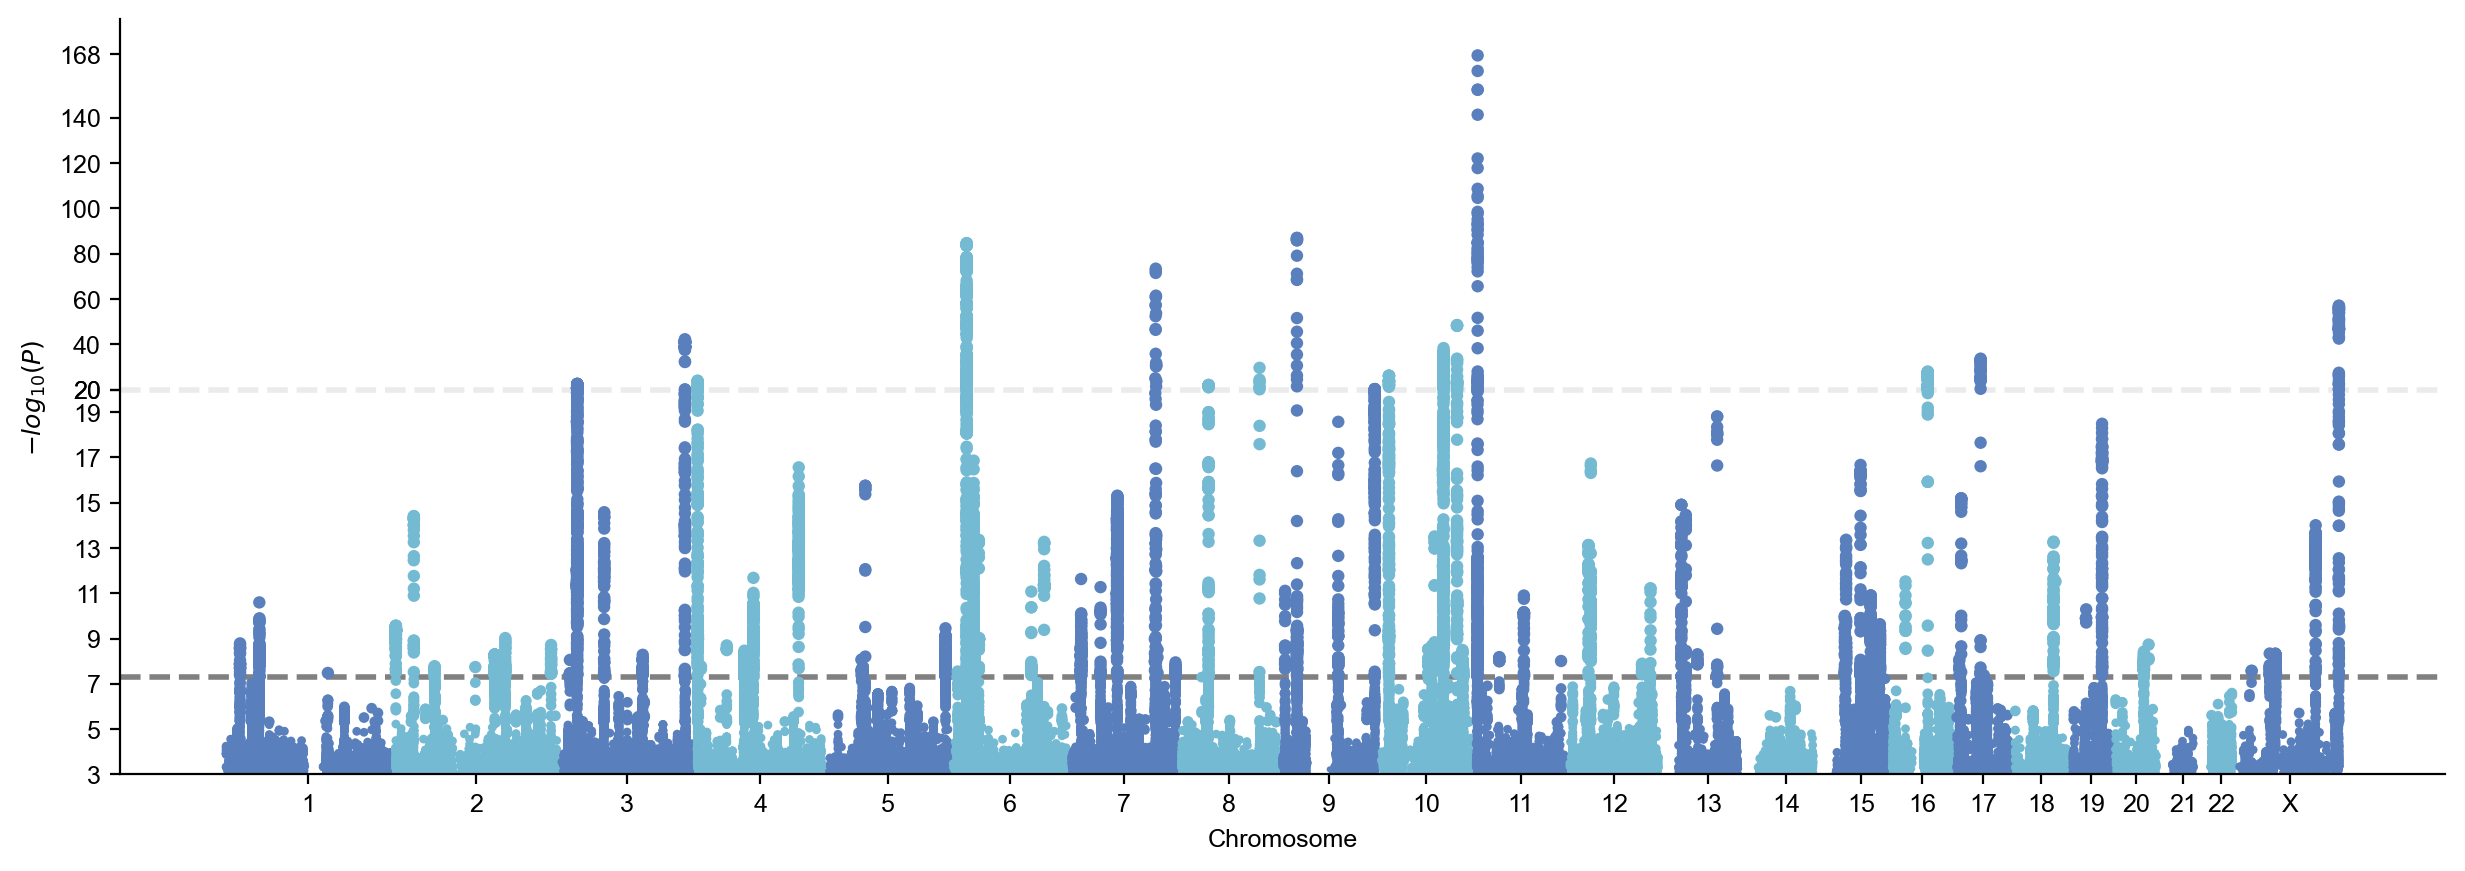

In [7]:
mysumstats.plot_mqq(skip=3,cut=20,mode= "m", check=False ,verbose=False)

(<Figure size 3000x1000 with 1 Axes>, <gwaslab.g_Log.Log at 0x7f6928adce20>)

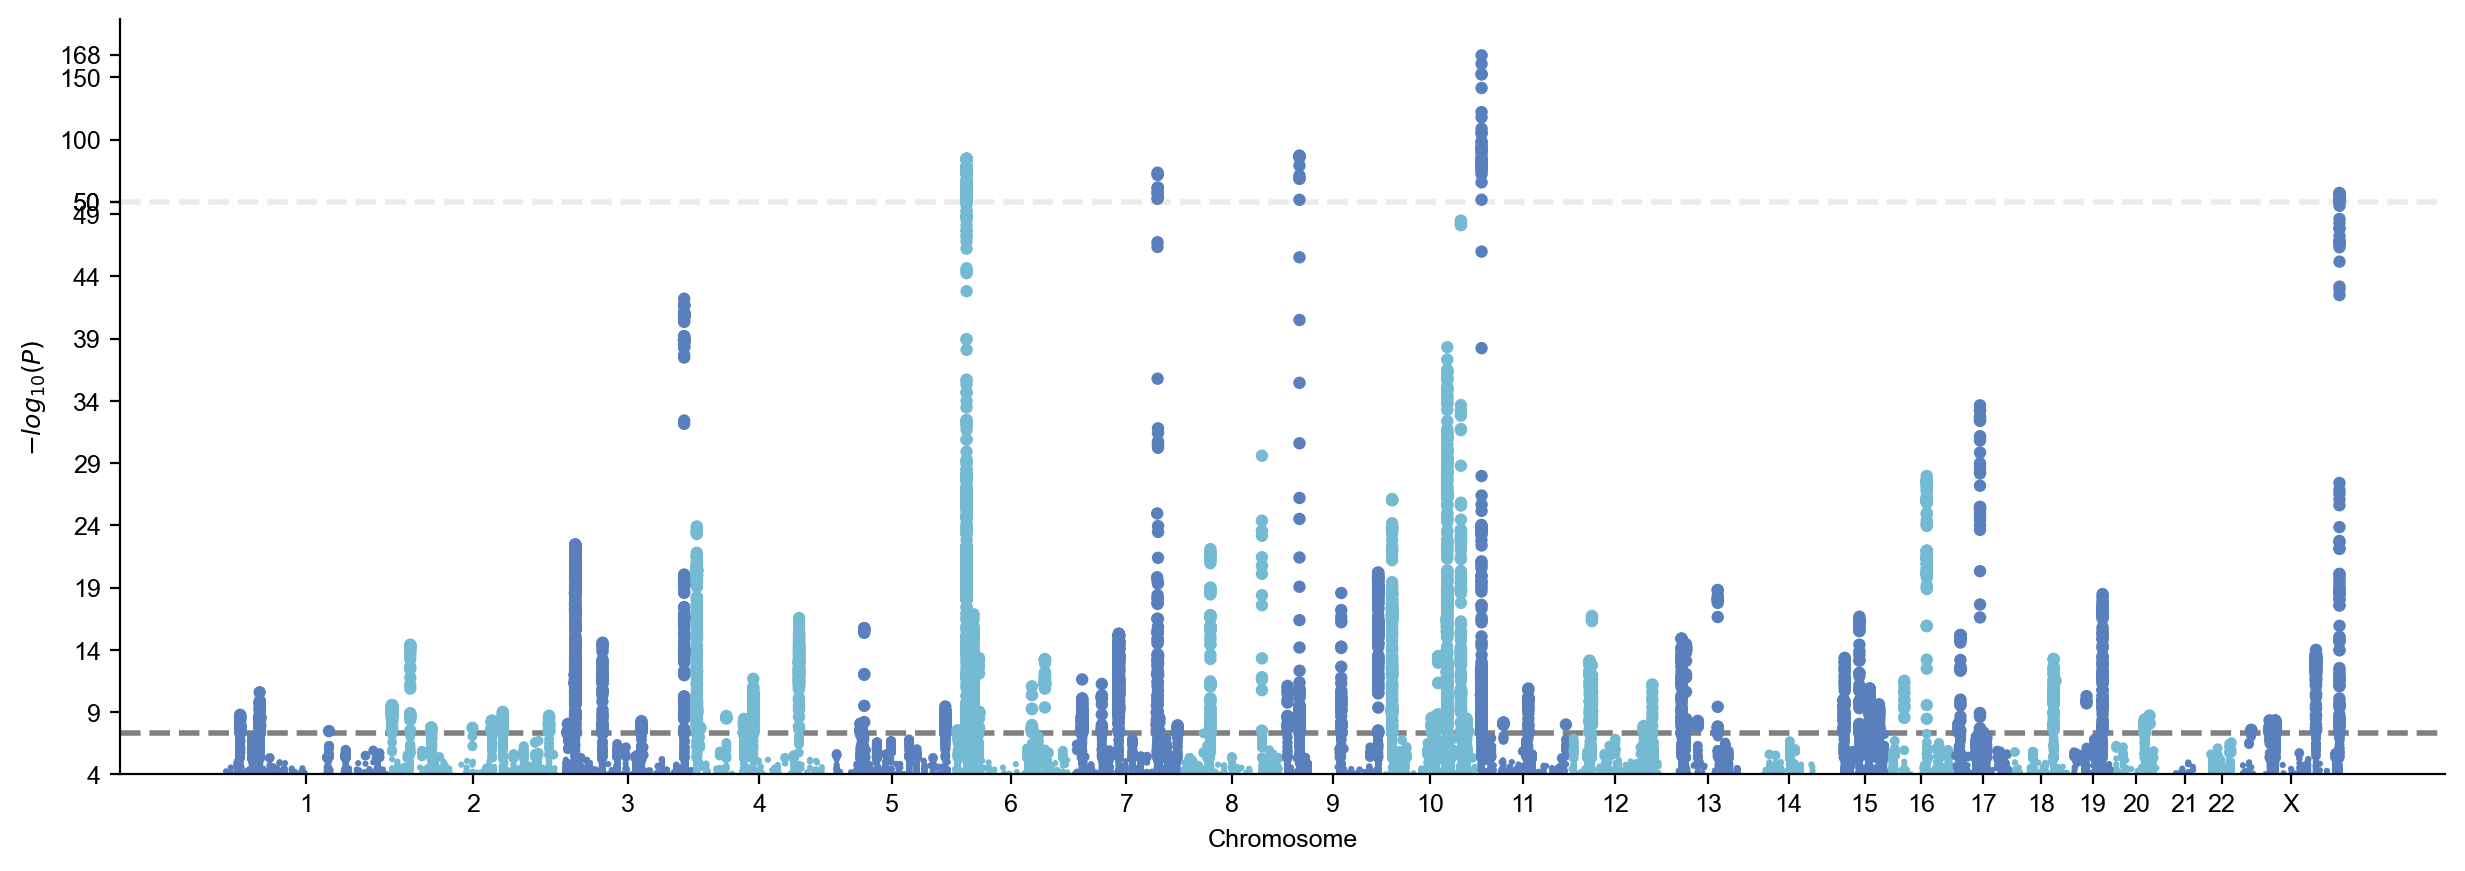

In [8]:
mysumstats.plot_mqq(skip=4,cut=50 ,mode= "m",check=False,verbose=False)

Make the Y axis jagged to indicate that it has been rescale. 

(<Figure size 3000x1000 with 1 Axes>, <gwaslab.g_Log.Log at 0x7f6928adce20>)

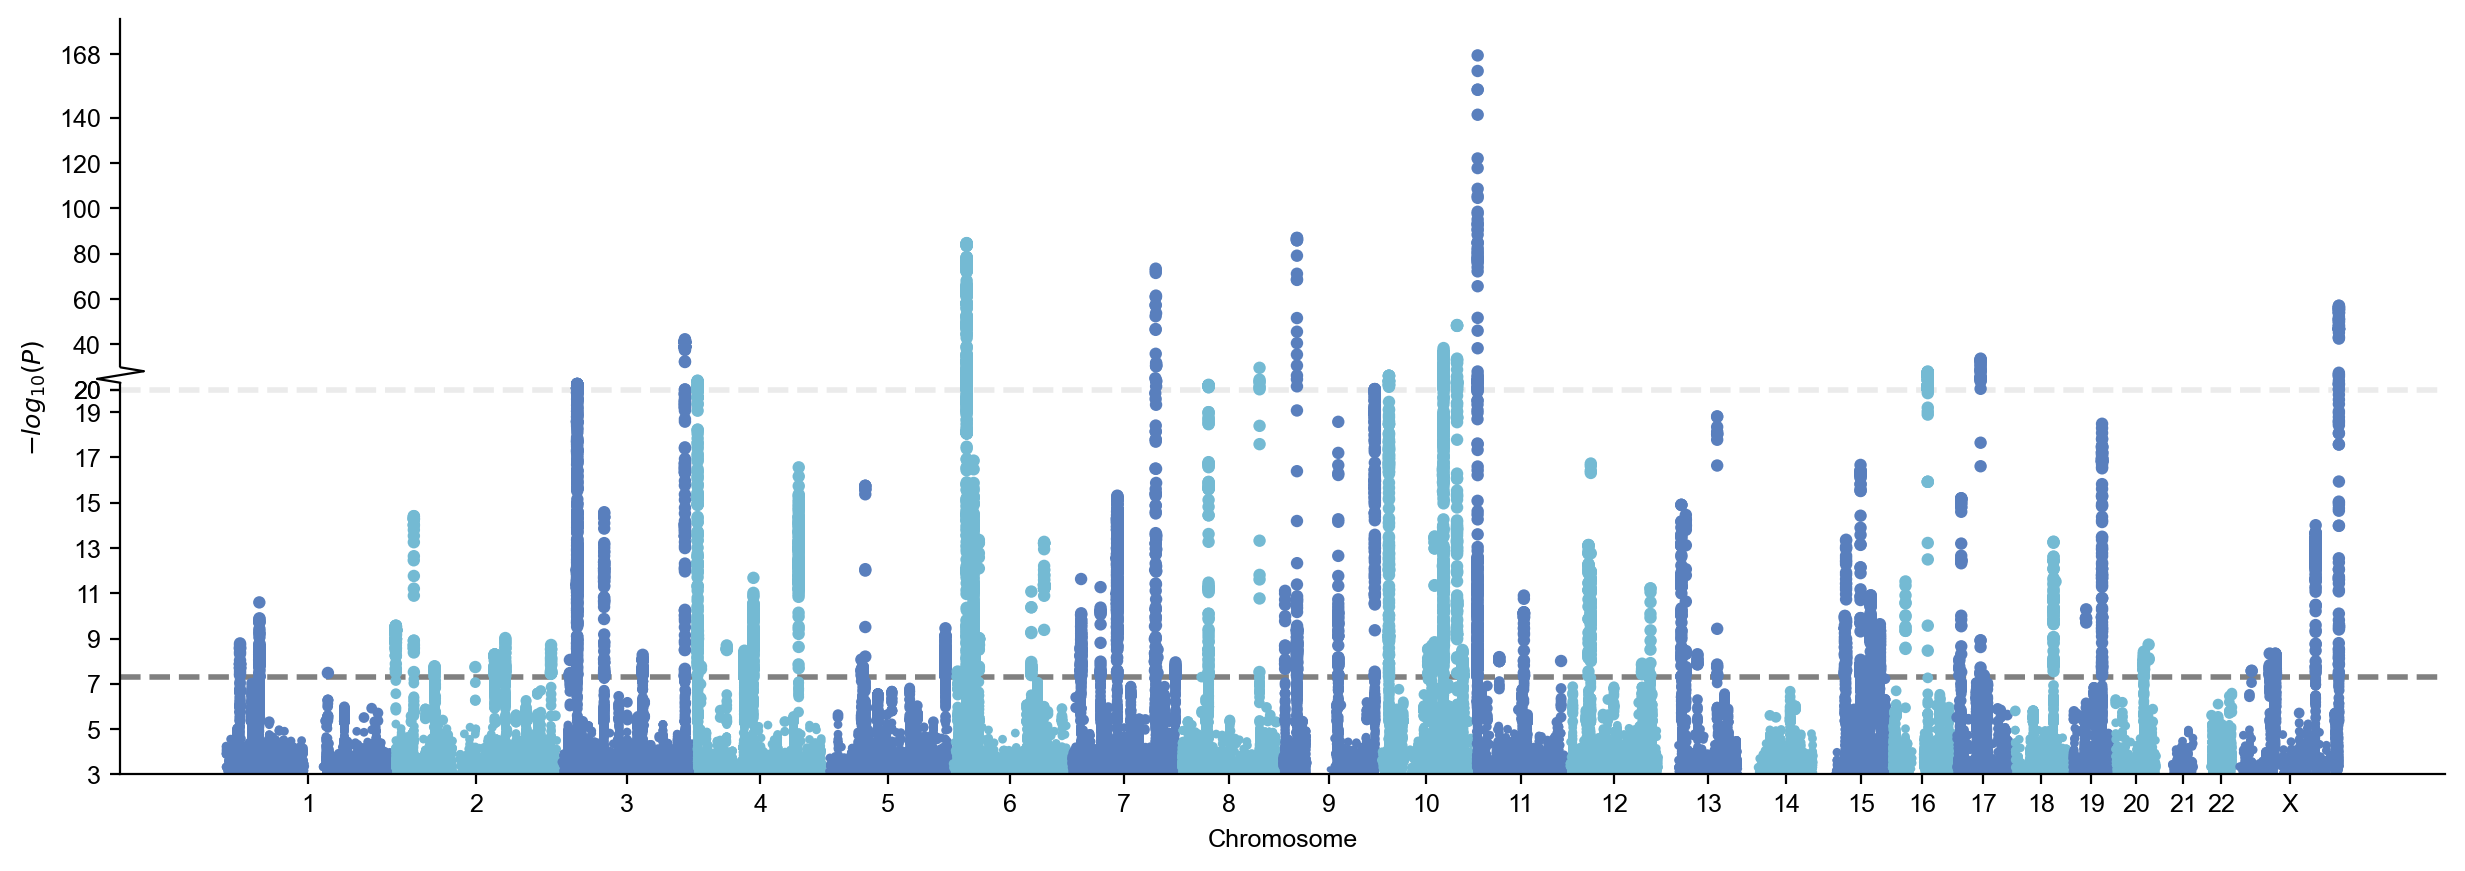

In [9]:
mysumstats.plot_mqq(skip=3,cut=20, jagged=True,mode= "m",check=False,verbose=False)

### X axis

- `use_rank`: if True, GWASLab will use position rank instead of the physical base-pair positions for x aixs.

There will be no gap if `use_rank = True`

(<Figure size 3000x1000 with 1 Axes>, <gwaslab.g_Log.Log at 0x7f6928adce20>)

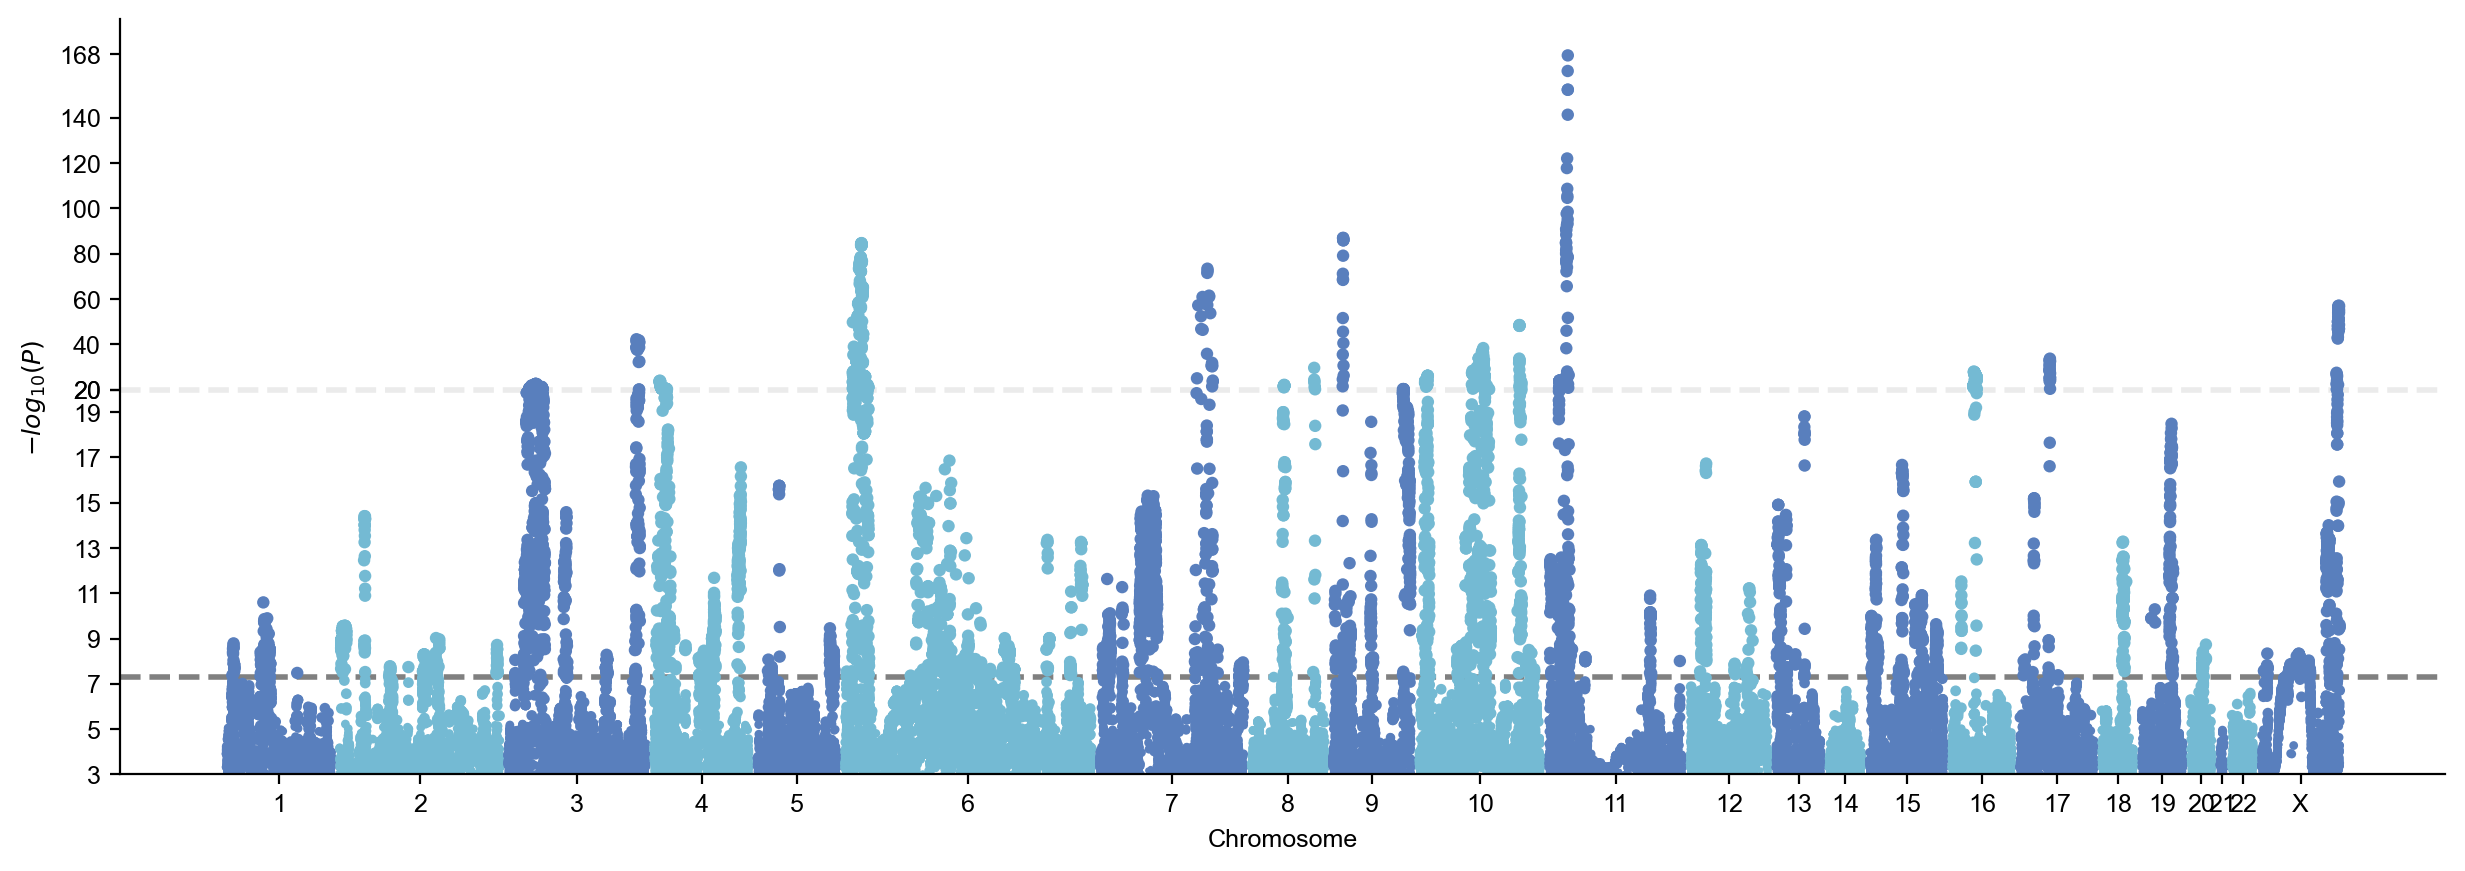

In [10]:
mysumstats.plot_mqq(skip=3,cut=20,use_rank=True,mode= "m",check=False,verbose=False)

### Annotation

`anno=True` : annoatate all lead variants with chr:pos

(<Figure size 3000x1000 with 1 Axes>, <gwaslab.g_Log.Log at 0x7f6928adce20>)

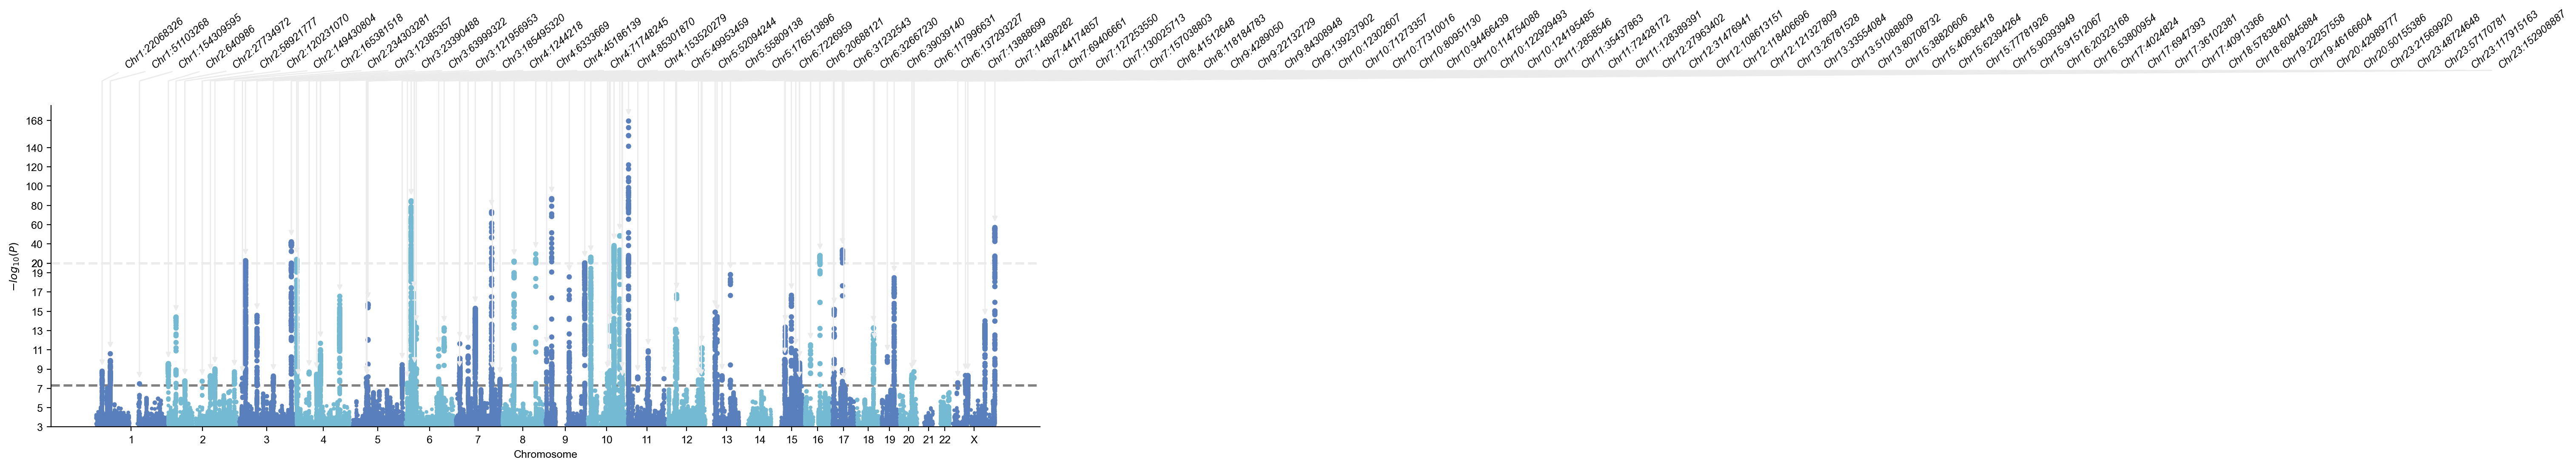

In [11]:
mysumstats.plot_mqq(skip=3,cut=20,anno=True,mode= "m",check=False,verbose=False)

Since there are a large number of novel loci, if we annotate all loci, it will be too messy. Let's only annotate the loci with P<1e-20 by specifying `sig_level_lead=1e-20`.

(<Figure size 3000x1000 with 1 Axes>, <gwaslab.g_Log.Log at 0x7f6928adce20>)

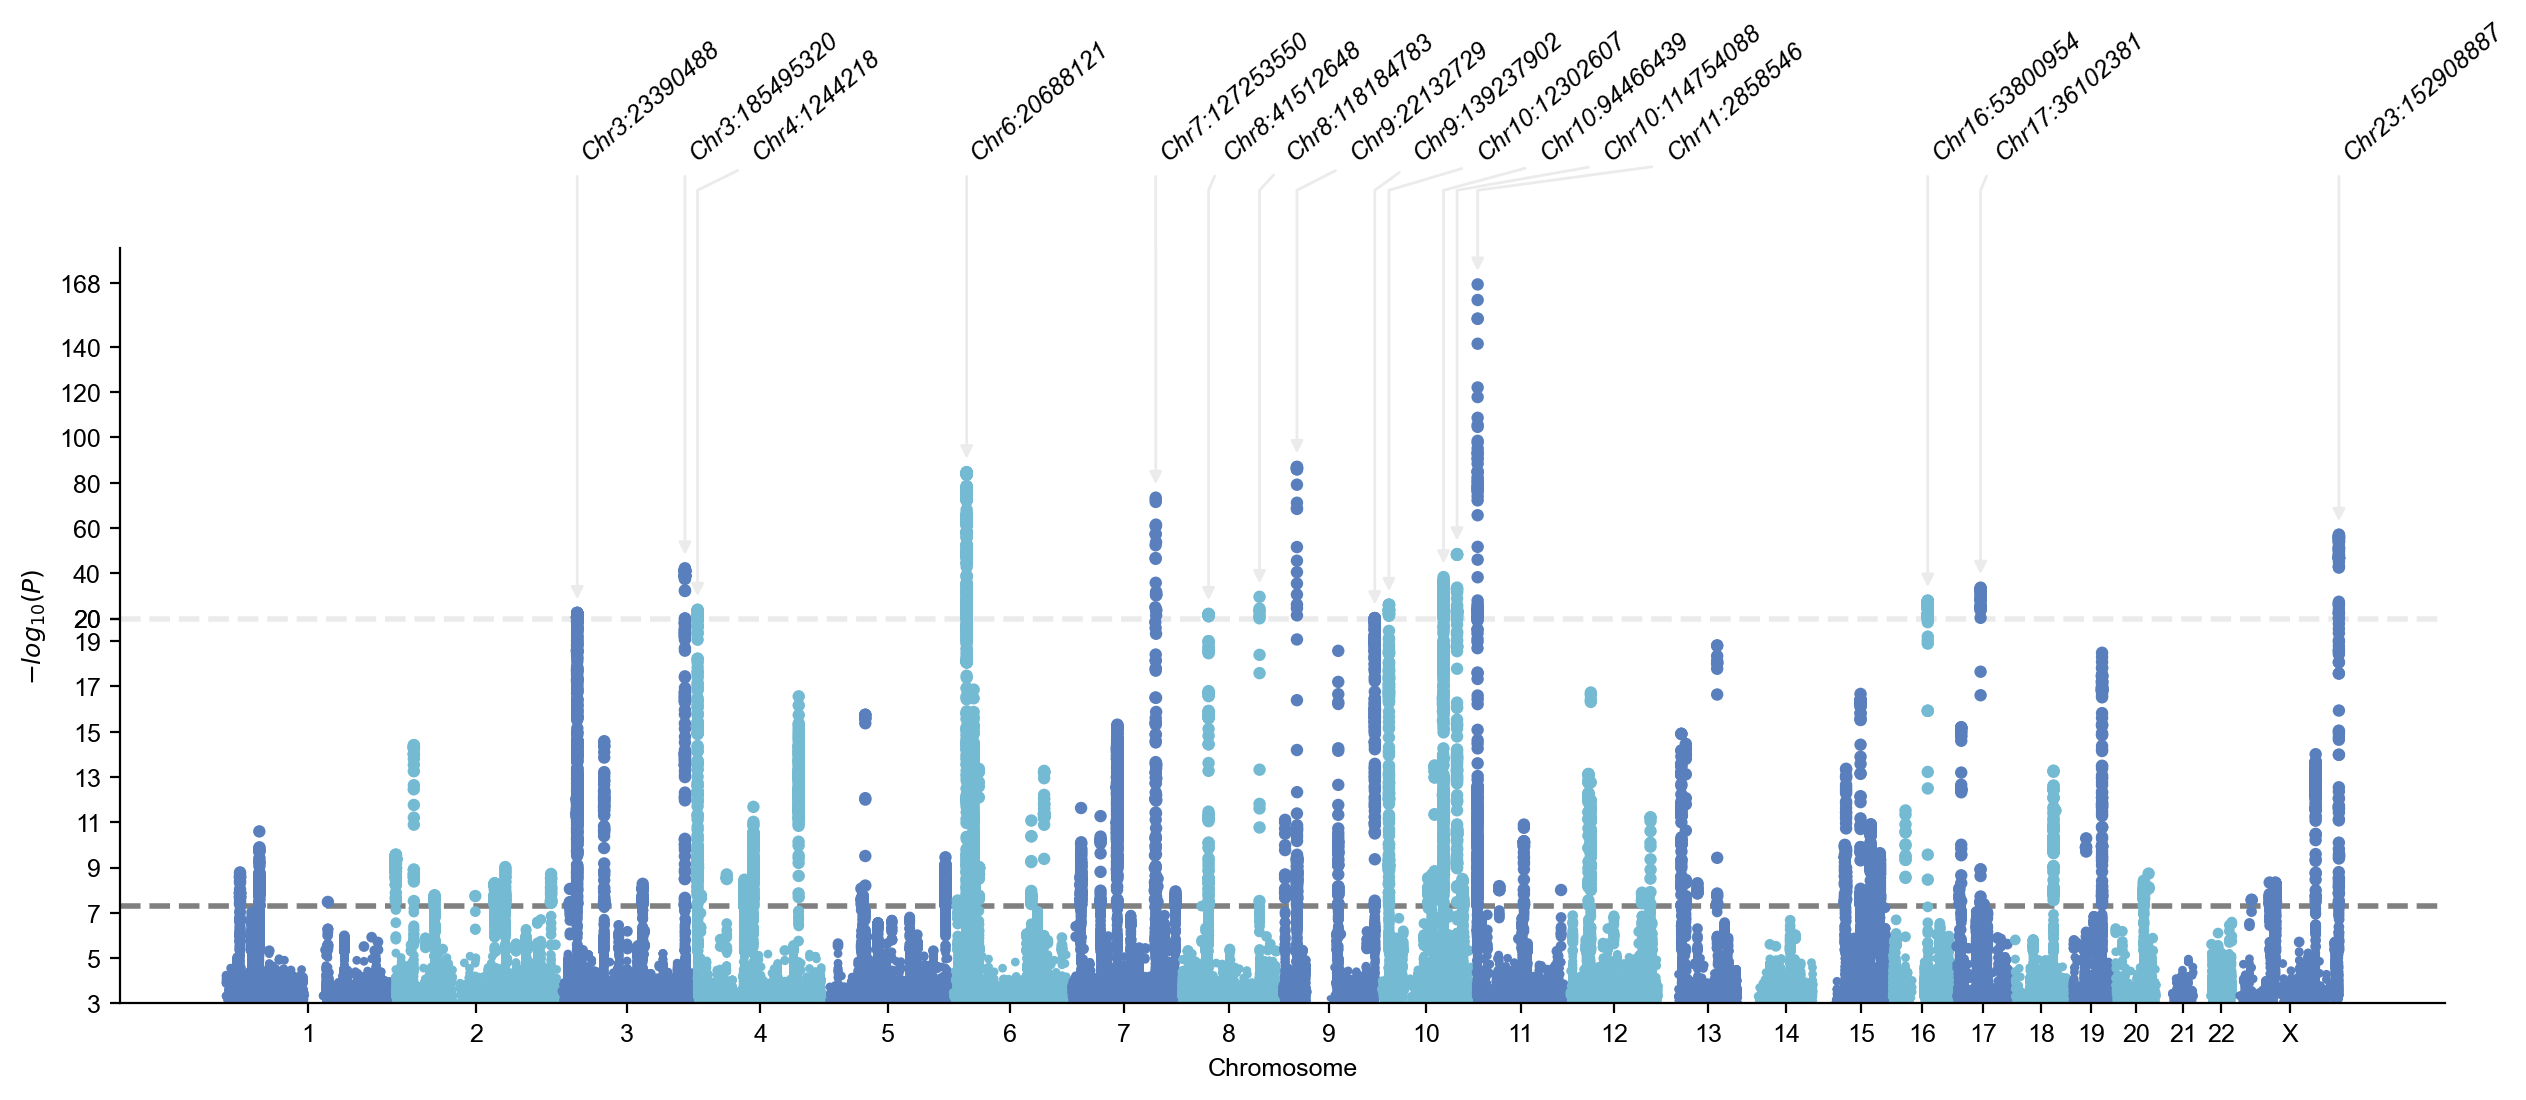

In [12]:
mysumstats.plot_mqq(skip=3,cut=20,anno=True, sig_level_lead=1e-20,mode= "m",check=False,verbose=False)

GWASLab provides three types of different annotation styles

`anno_style="right"`, `anno_style="expand"`, and `anno_style="tight"`

(<Figure size 3000x1000 with 1 Axes>, <gwaslab.g_Log.Log at 0x7f6928adce20>)

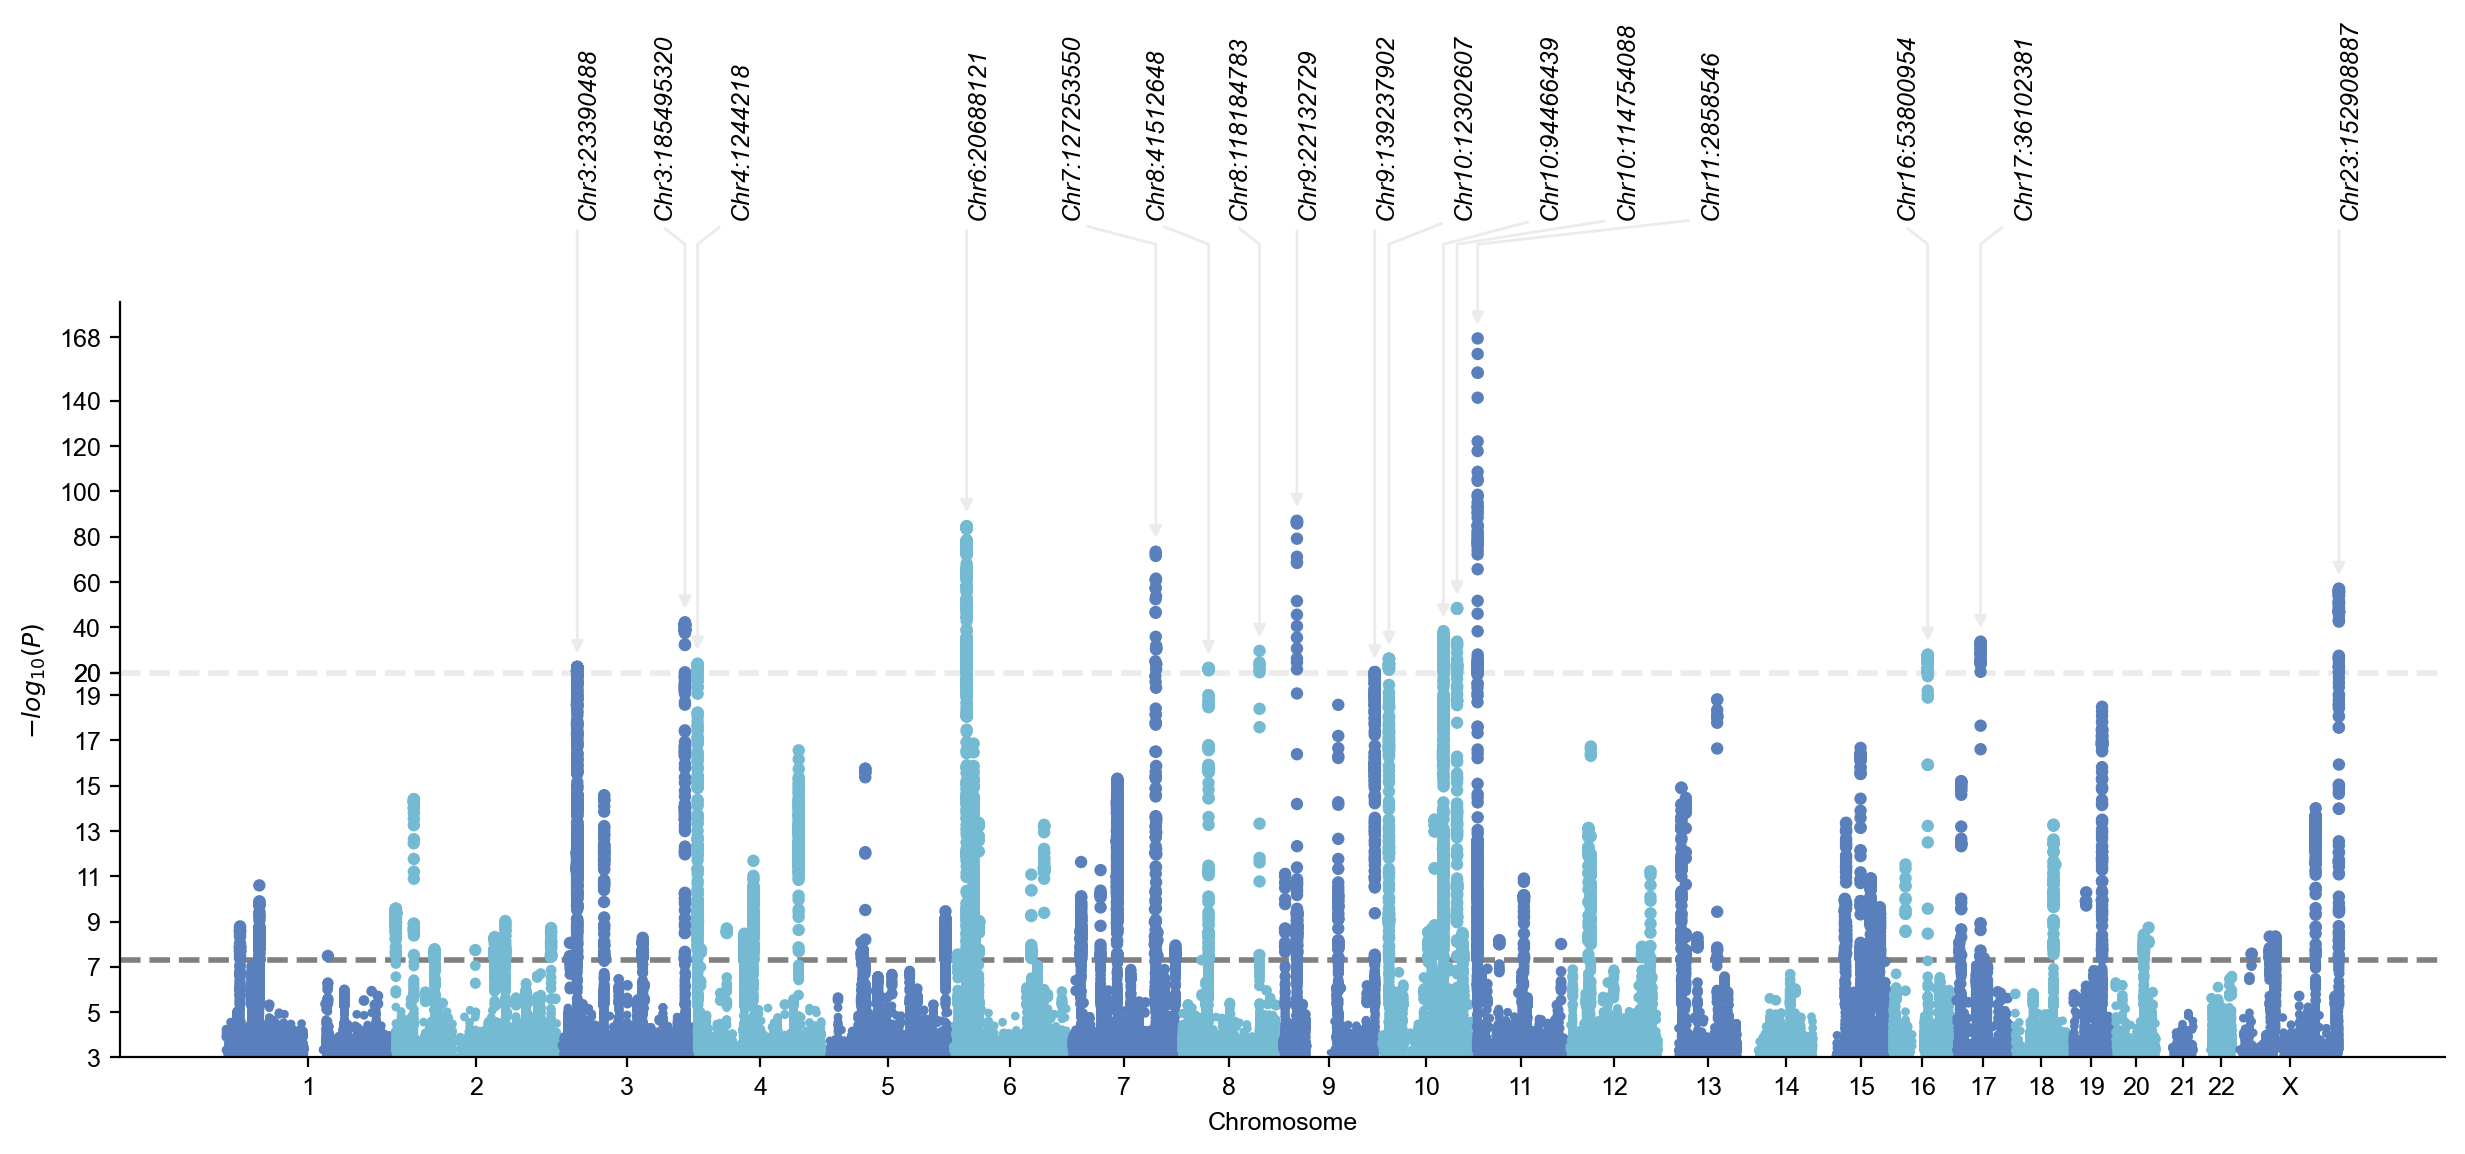

In [13]:
mysumstats.plot_mqq(skip=3,cut=20,anno=True,anno_style="expand", sig_level_lead=1e-20,mode= "m",check=False,verbose=False)

(<Figure size 3000x1000 with 1 Axes>, <gwaslab.g_Log.Log at 0x7f6928adce20>)

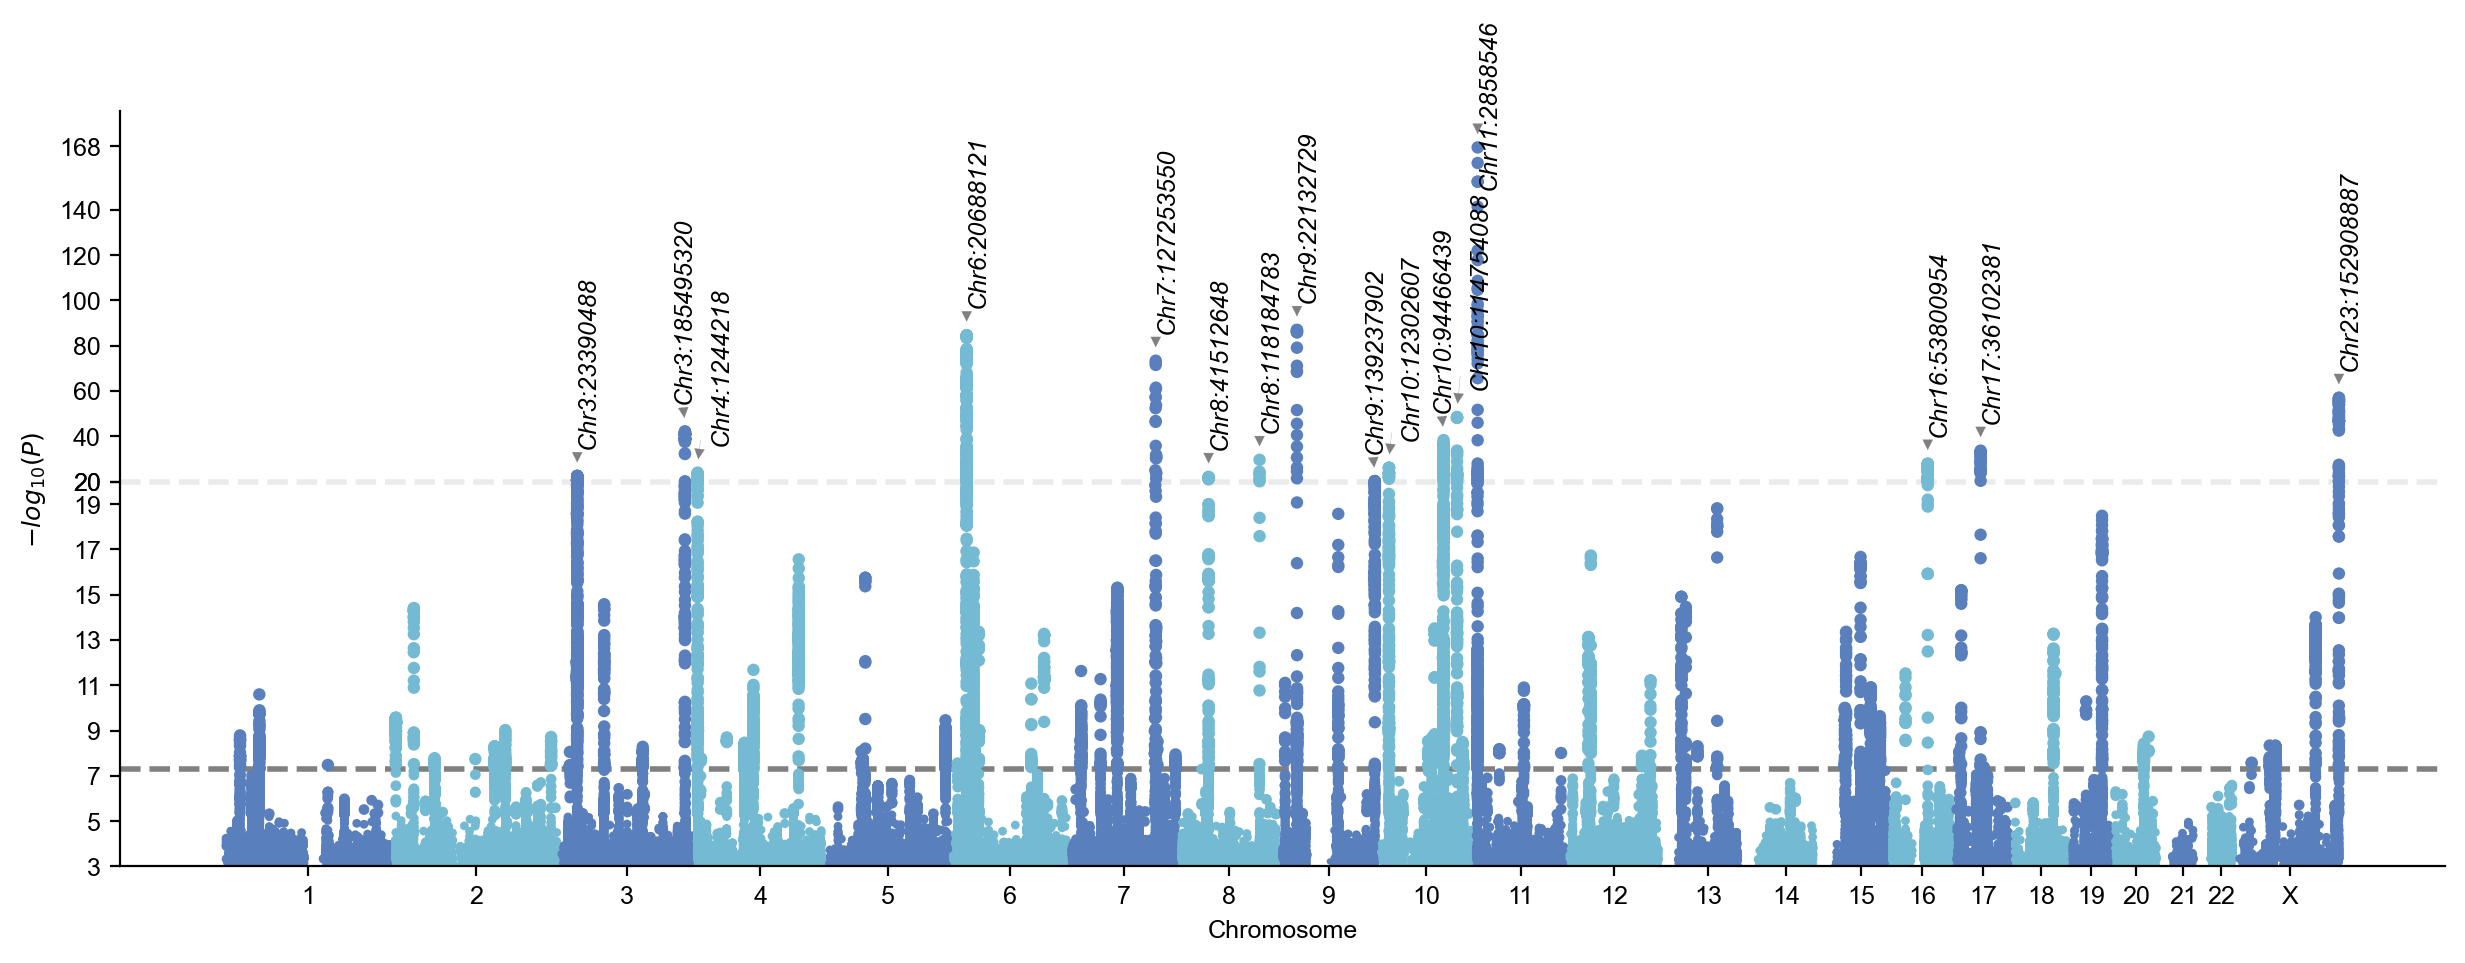

In [14]:
mysumstats.plot_mqq(skip=3,cut=20,anno=True,anno_style="tight", sig_level_lead=1e-20,mode= "m", check=False,verbose=False)

If we want to annotate only a subset of variants, we can pass a list of variant IDs to `anno_set`. 

Let's check all lead variants and select only two to annotate.

In [15]:
mysumstats.get_lead(verbose=False).sort_values(by="P")

SNPID  CHR        POS  EA NEA     EAF              P  \
7947442     11:2858546_C_T   11    2858546   C   T  0.6209  2.580000e-168   
6903480     9:22132729_A_G    9   22132729   G   A  0.4367   9.848000e-88   
4664126     6:20688121_T_A    6   20688121   T   A  0.5758   2.062000e-85   
5965364    7:127253550_C_T    7  127253550   C   T  0.9081   4.101000e-74   
12554976   X:152908887_G_A   23  152908887   G   A  0.6792   9.197000e-58   
...                    ...  ...        ...  ..  ..     ...            ...   
12272930    X:21569920_A_G   23   21569920   G   A  0.3190   2.616000e-08   
4599424      6:7226959_C_T    6    7226959   C   T  0.6657   2.849000e-08   
10287151  15:90393949_C_CT   15   90393949   C  CT  0.3445   3.134000e-08   
534095    1:154309595_TA_T    1  154309595  TA   T  0.0947   3.289000e-08   
10874150   17:40913366_C_T   17   40913366   C   T  0.4707   4.159000e-08   

           STATUS  
7947442   1995999  
6903480   1995999  
4664126   1995999  
5965364   1995999  
12554976  1995999  
...           ...  
12272930  1995999  
4599424   1995999  
10287151  1995999  
534095    1995999  
10874150  1995999  

[89 rows x 8 columns]

This time, let's annotate 1:154309595_TA_T and 2:27734972_G_A with its nearest gene names!

- `anno="GENENAME"` : automatically annoatate the nearest gene name
- `anno_set` : the set of variants you want to annotate

(<Figure size 3000x1000 with 1 Axes>, <gwaslab.g_Log.Log at 0x7f6928adce20>)

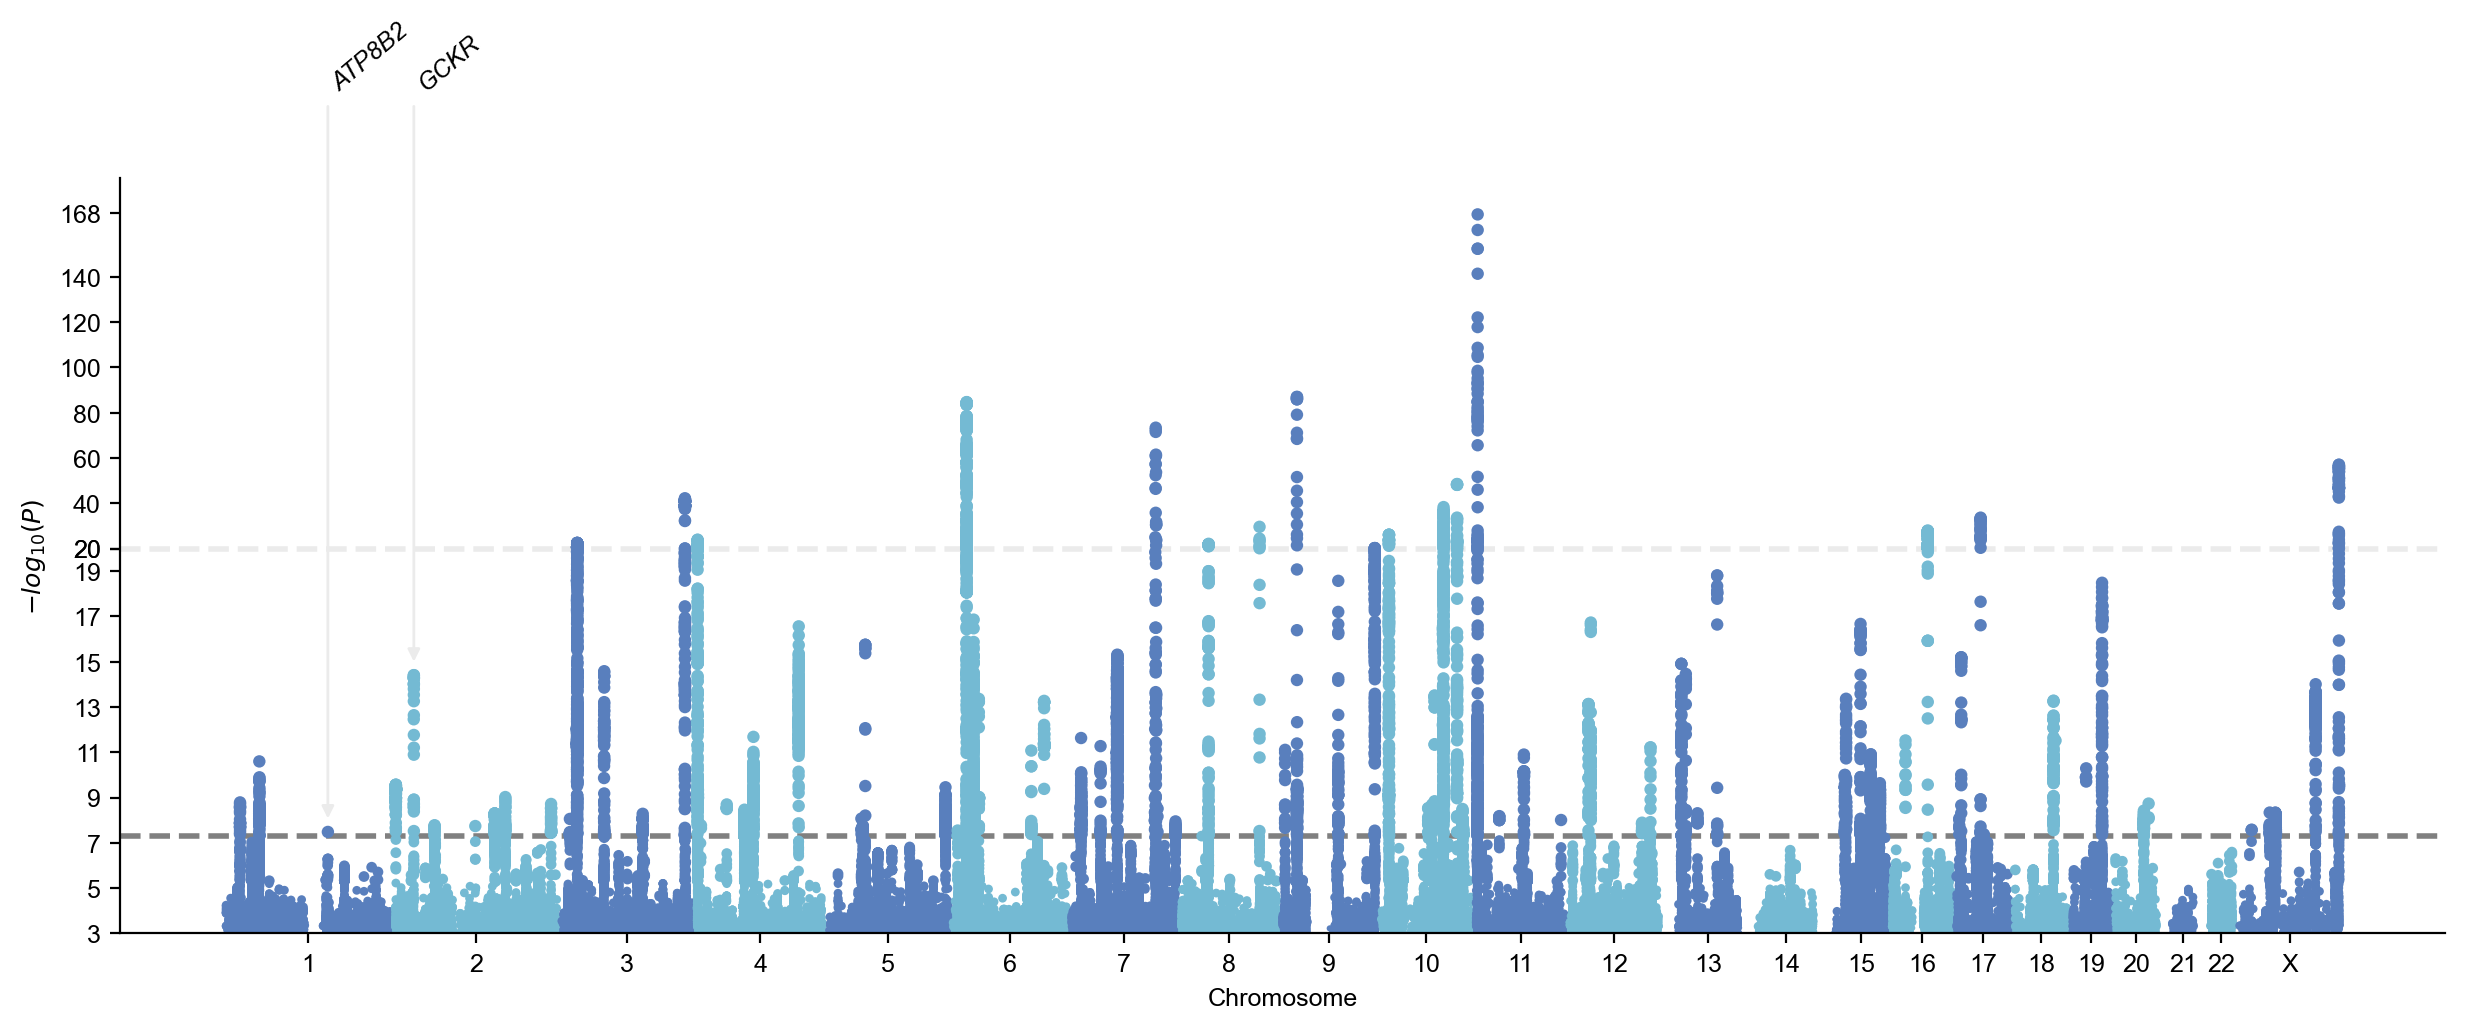

In [16]:
mysumstats.plot_mqq(skip=3,cut=20,anno="GENENAME",anno_set=["1:154309595_TA_T","2:27734972_G_A"],mode= "m",check=False,verbose=False)

Annotate with customized text

(<Figure size 3000x1000 with 1 Axes>, <gwaslab.g_Log.Log at 0x7f6928adce20>)

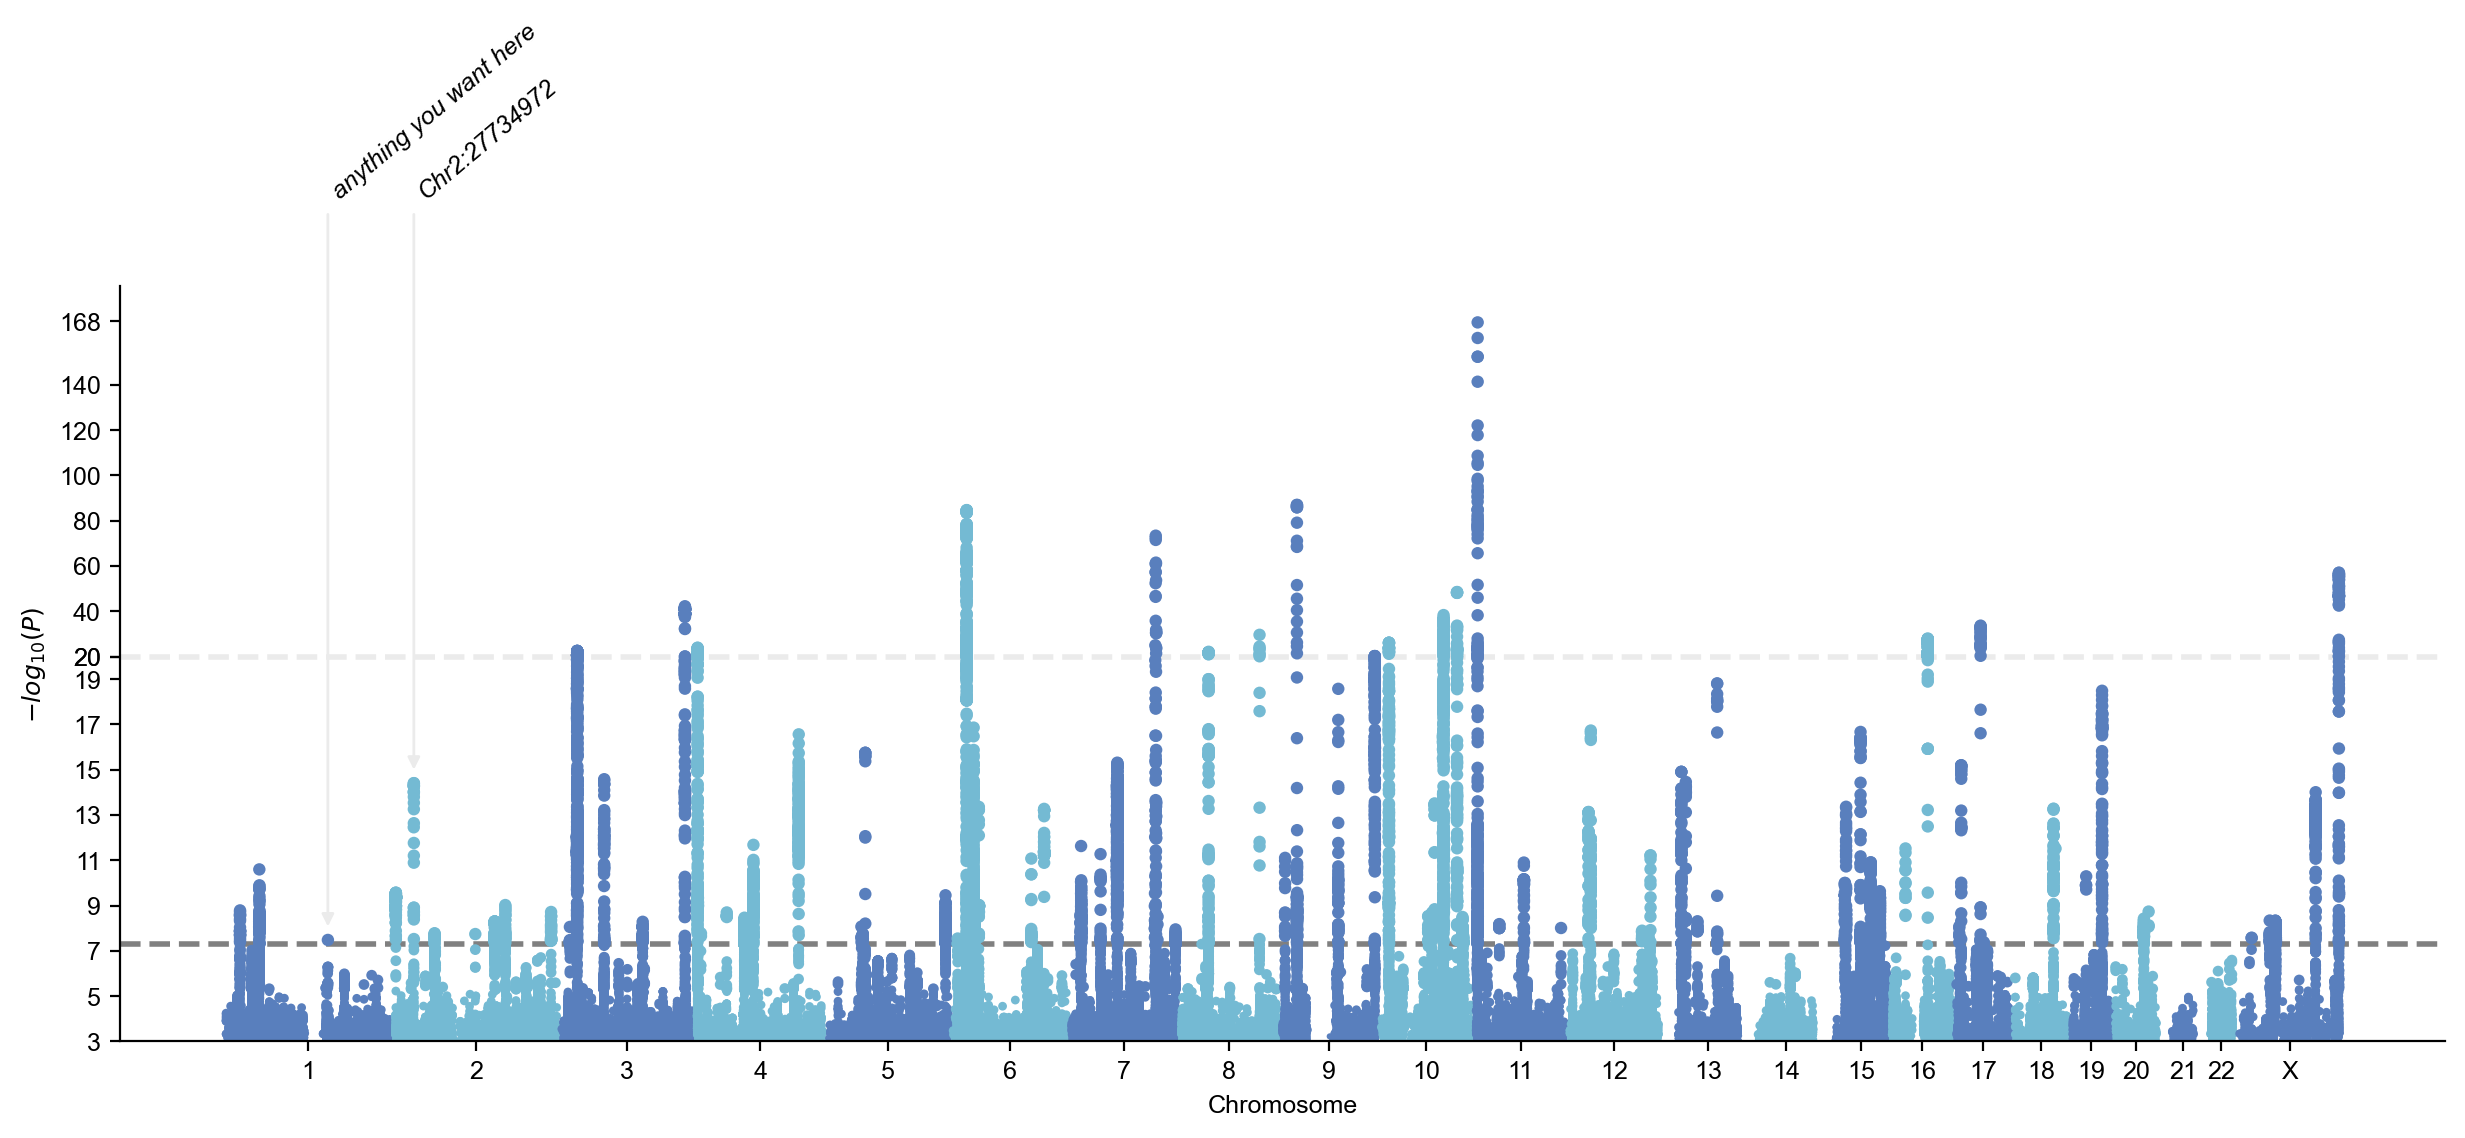

In [17]:
mysumstats.plot_mqq(skip=3,
                    cut=20,
                    anno=True,
                    anno_set=["1:154309595_TA_T","2:27734972_G_A"],
                    anno_alias={"1:154309595_TA_T":"anything you want here"},
                    mode= "m",
                    verbose=False)

### Highlight loci & Pinpoint variants (single group)

- `highlight`: a variant list of loci you want to highlight
- `pinpoint`: a variant list of variants you want to pinpoint

(<Figure size 3000x1000 with 1 Axes>, <gwaslab.g_Log.Log at 0x7f6928adce20>)

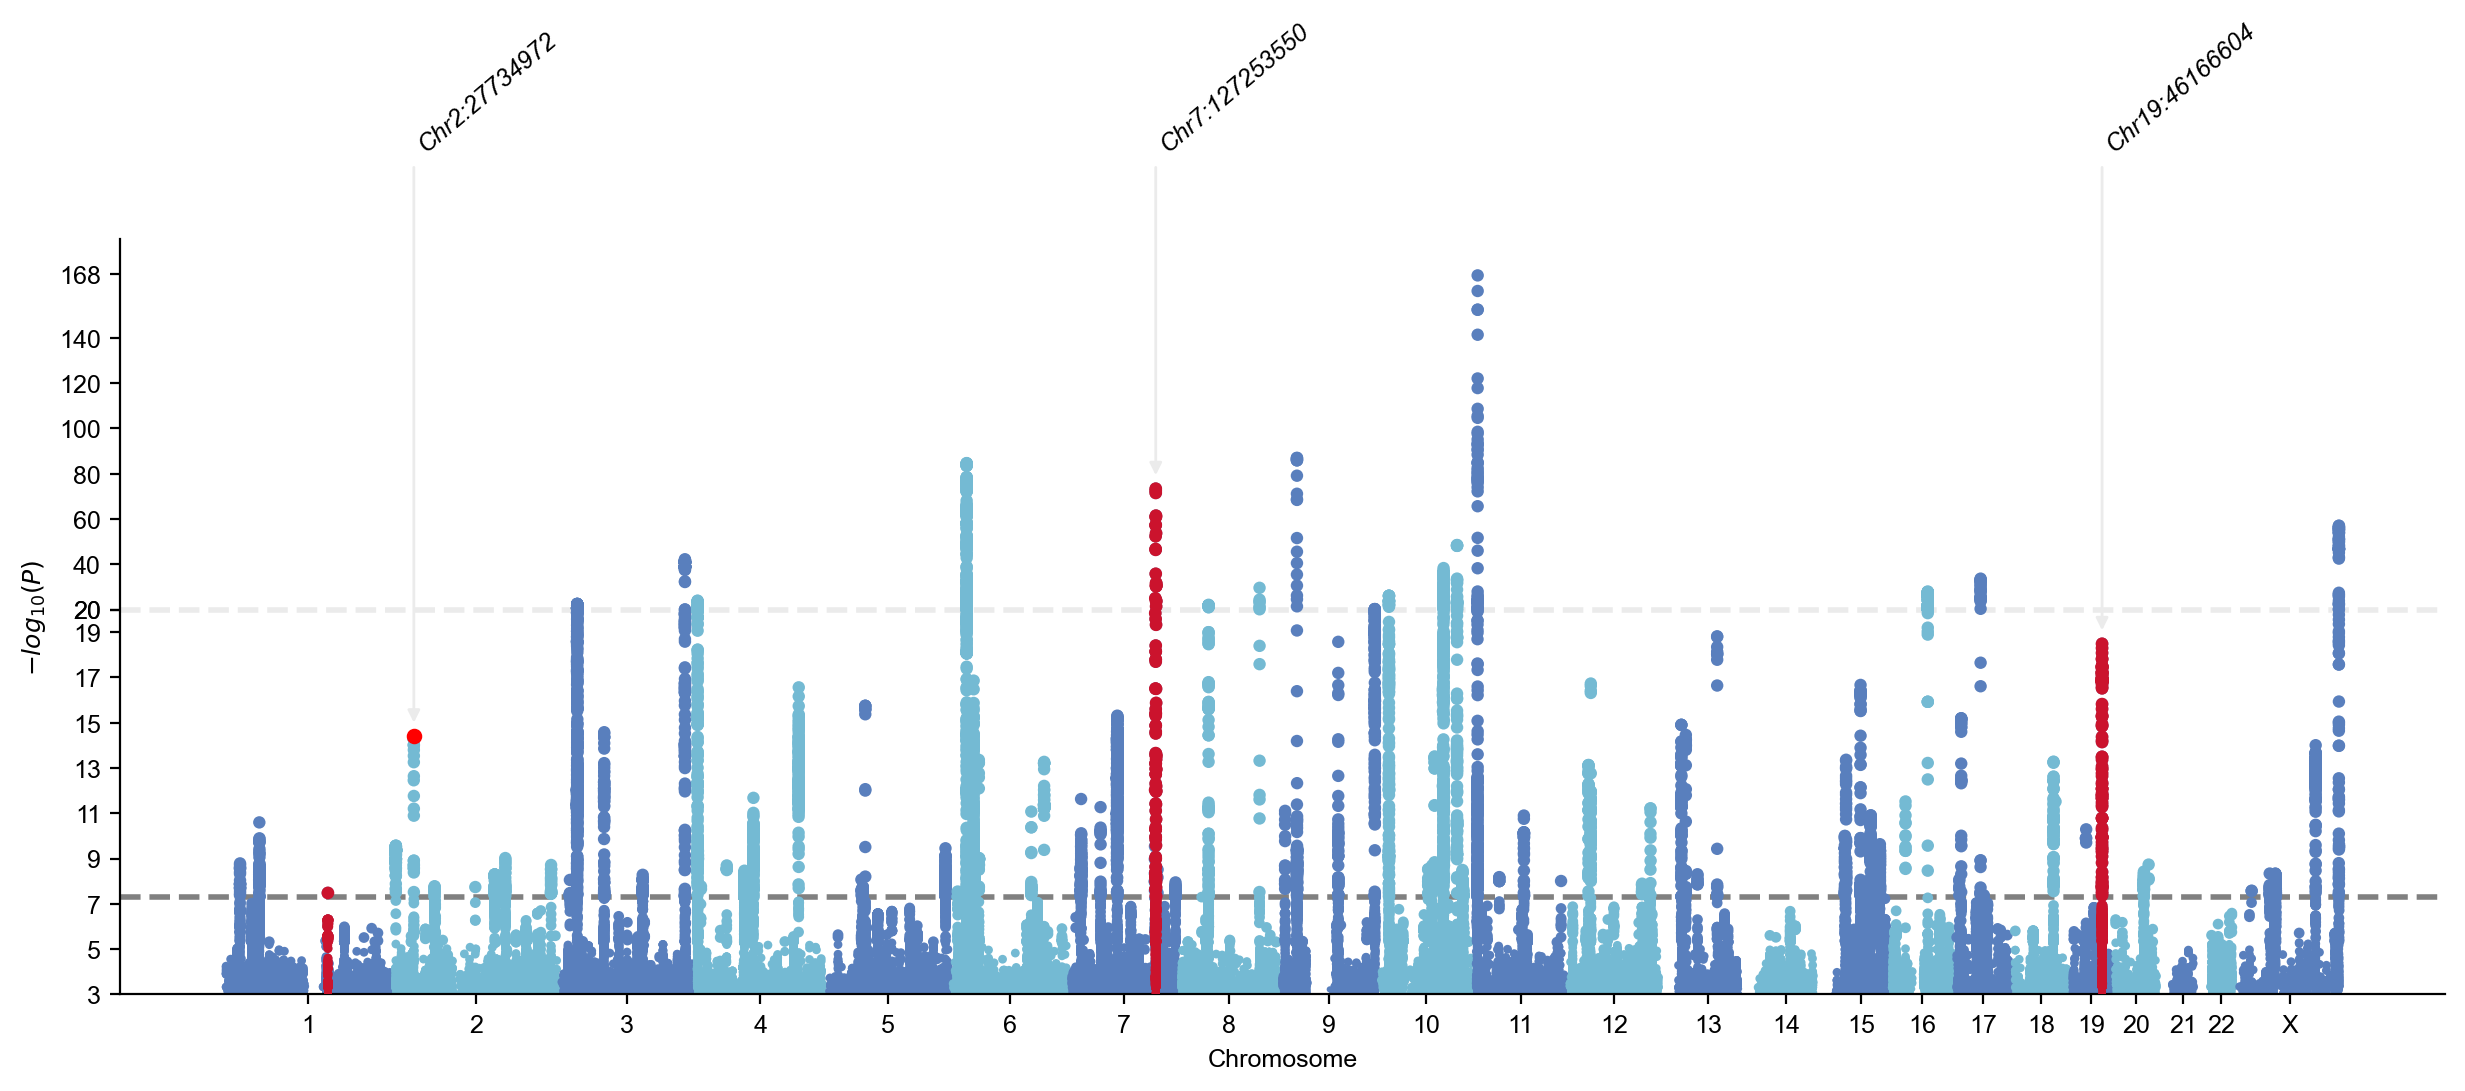

In [18]:
mysumstats.plot_mqq(skip=3,cut=20,
                    anno=True,
                    anno_set=["2:27734972_G_A","2:27734972_G_A","7:127253550_C_T", "19:46166604_C_T"],
                    highlight=["19:46166604_C_T","1:154309595_TA_T","7:127253550_C_T"],
                    highlight_windowkb=1000,
                    pinpoint=["2:27734972_G_A"],
                    mode= "m",
                    check=False,verbose=False)

### Highlight loci & Pinpoint variants (multi-group)

Instead of a list, you can provide a list of lists. Each member list is then a group.

(<Figure size 3000x1000 with 1 Axes>, <gwaslab.g_Log.Log at 0x7f6928adce20>)

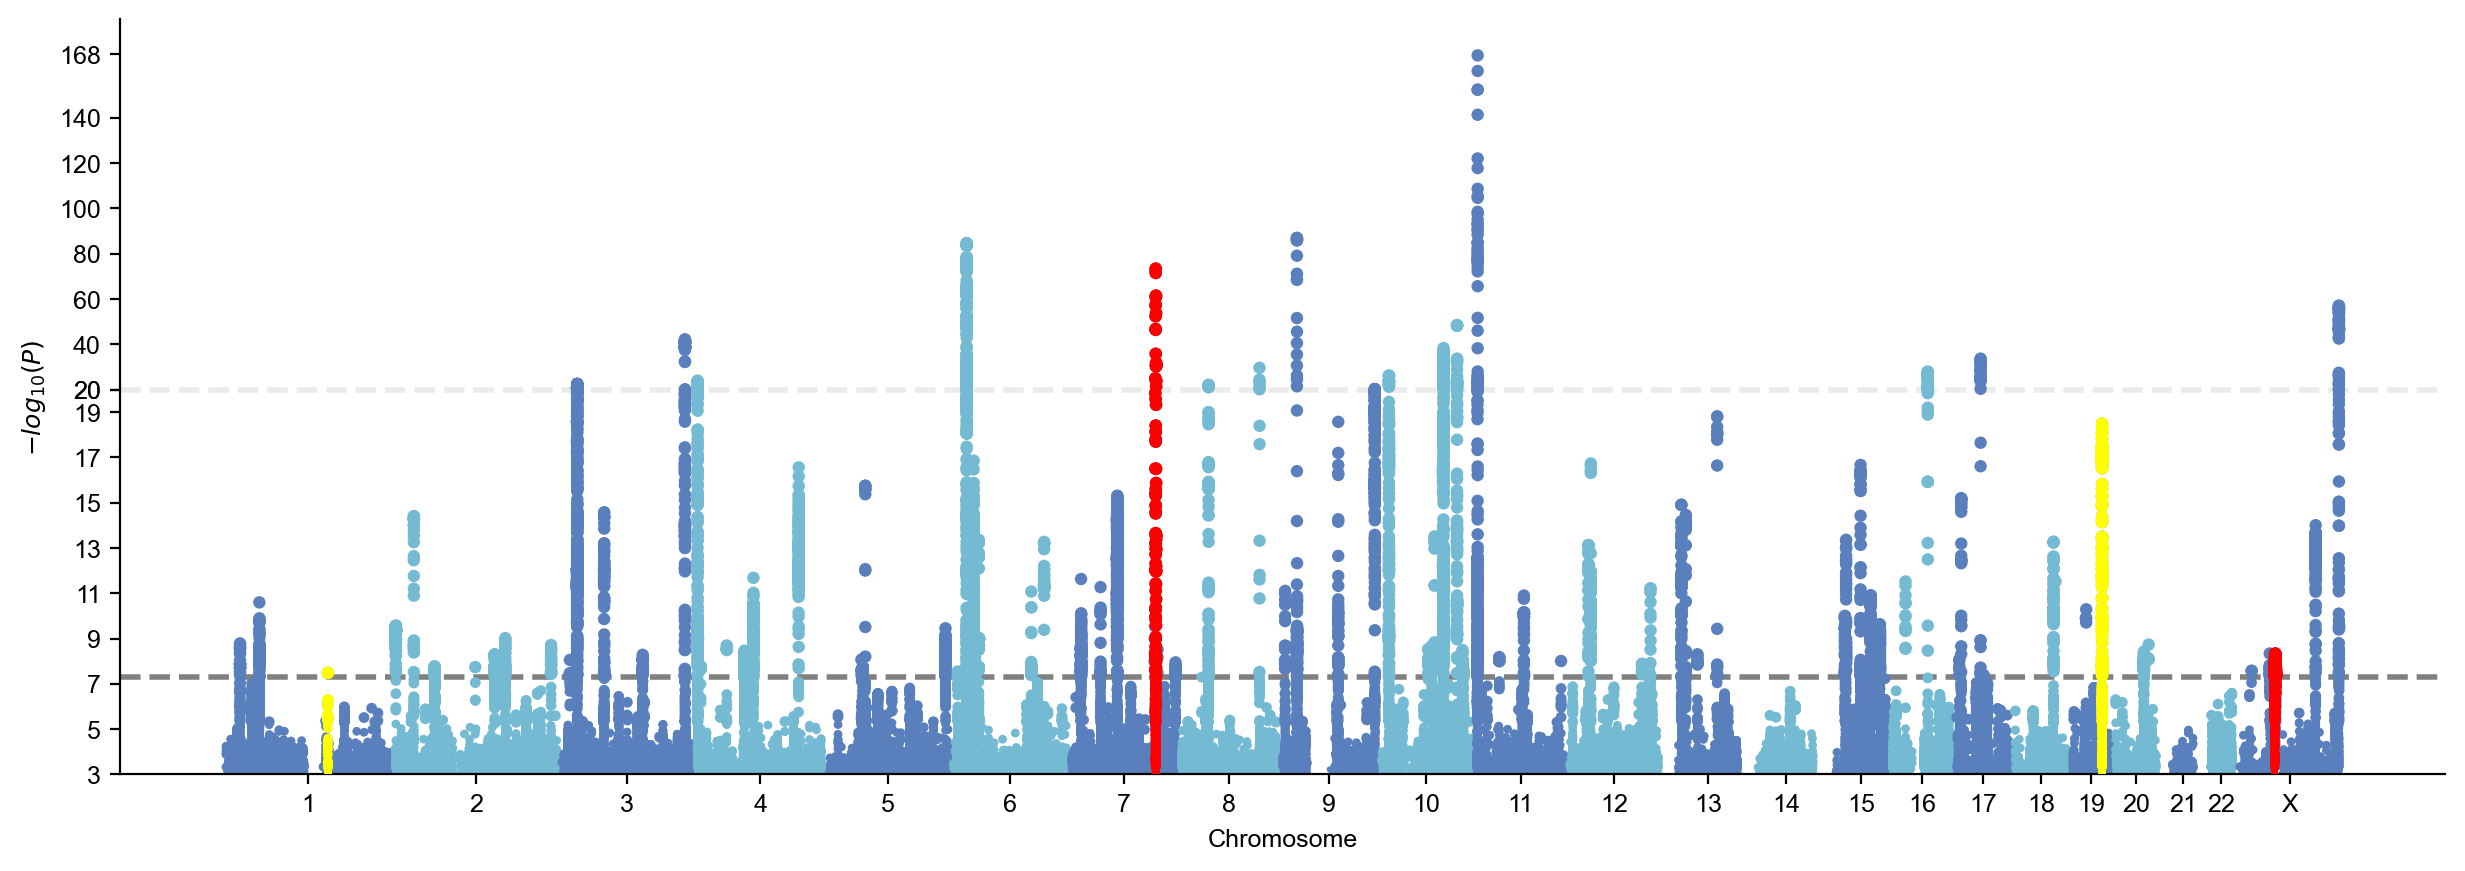

In [19]:
mysumstats.plot_mqq(skip=3,cut=20,
                    highlight=[
                               ["19:46166604_C_T","1:154309595_TA_T"],
                               ["X:57170781_A_AT","7:127253550_C_T"]
                              ],
                    highlight_windowkb=1000,
                    highlight_color=["yellow","red"],
                    mode= "m",
                    check=False,verbose=False)

### MAF-stratified QQ plot

(<Figure size 3000x1000 with 2 Axes>, <gwaslab.g_Log.Log at 0x7f6928adce20>)

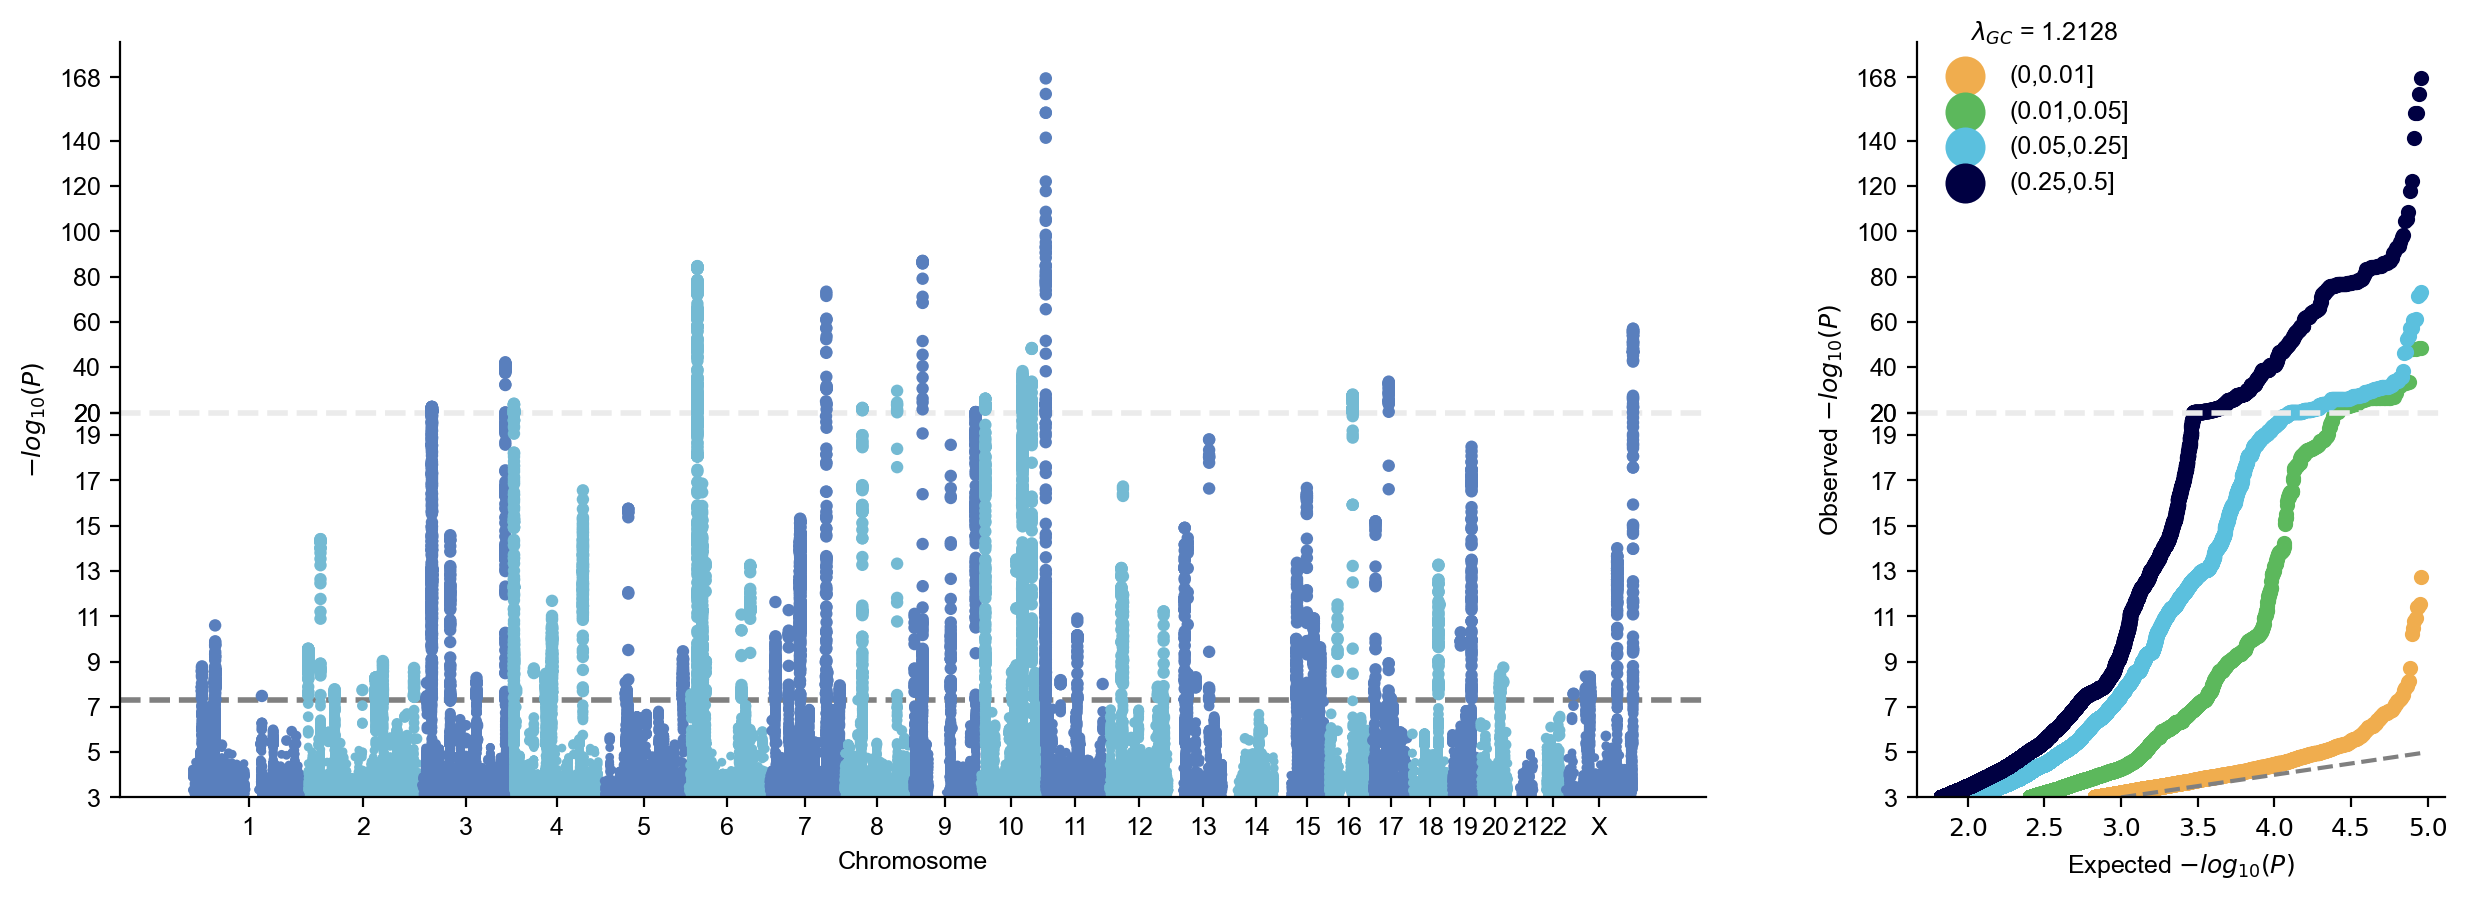

In [20]:
mysumstats.plot_mqq(skip=3,cut=20, mode="mqq",stratified=True,check=False,verbose=False)

### Auxiliary lines

(<Figure size 3000x1000 with 1 Axes>, <gwaslab.g_Log.Log at 0x7f6928adce20>)

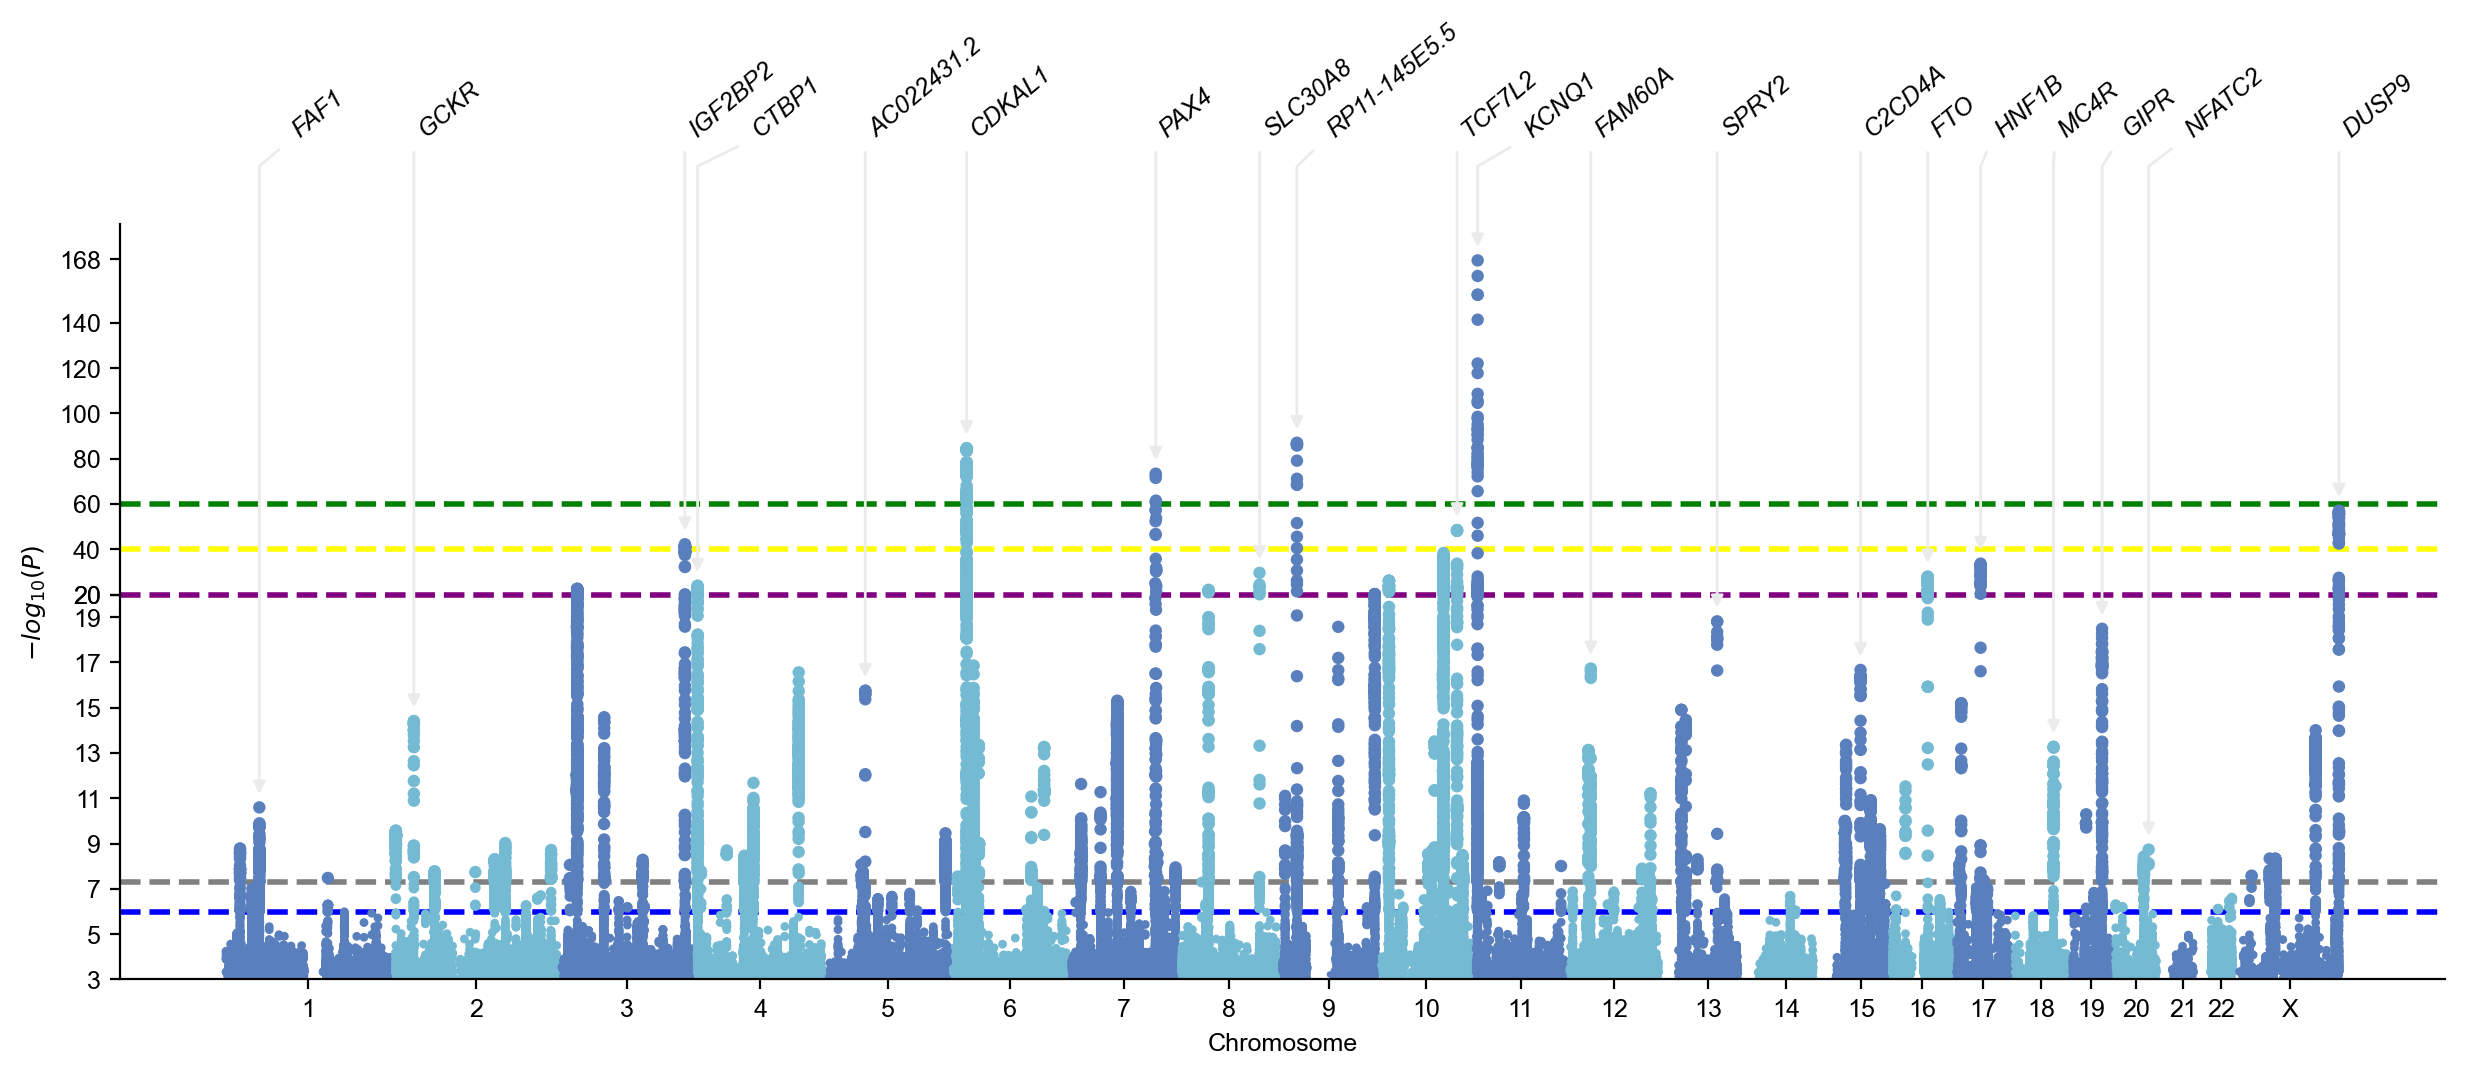

In [21]:
mysumstats.plot_mqq(skip=3,
                build="19",
                anno="GENENAME",
                windowsizekb=1000000,
                cut=20,
                cut_line_color="purple",
                sig_level=5e-8,  
                sig_level_lead=1e-6, 
                sig_line_color="grey",
                suggestive_sig_line = True,
                suggestive_sig_level = 1e-6,
                suggestive_sig_line_color="blue",
                additional_line=[1e-40,1e-60],
                additional_line_color=["yellow","green"],
                mode= "m",check=False,verbose=False)

### Font and marker size

- `fontsize`
- `anno_fontsize`
- `title_fontsize`
- `marker_size`

(<Figure size 3000x1000 with 1 Axes>, <gwaslab.g_Log.Log at 0x7f6928adce20>)

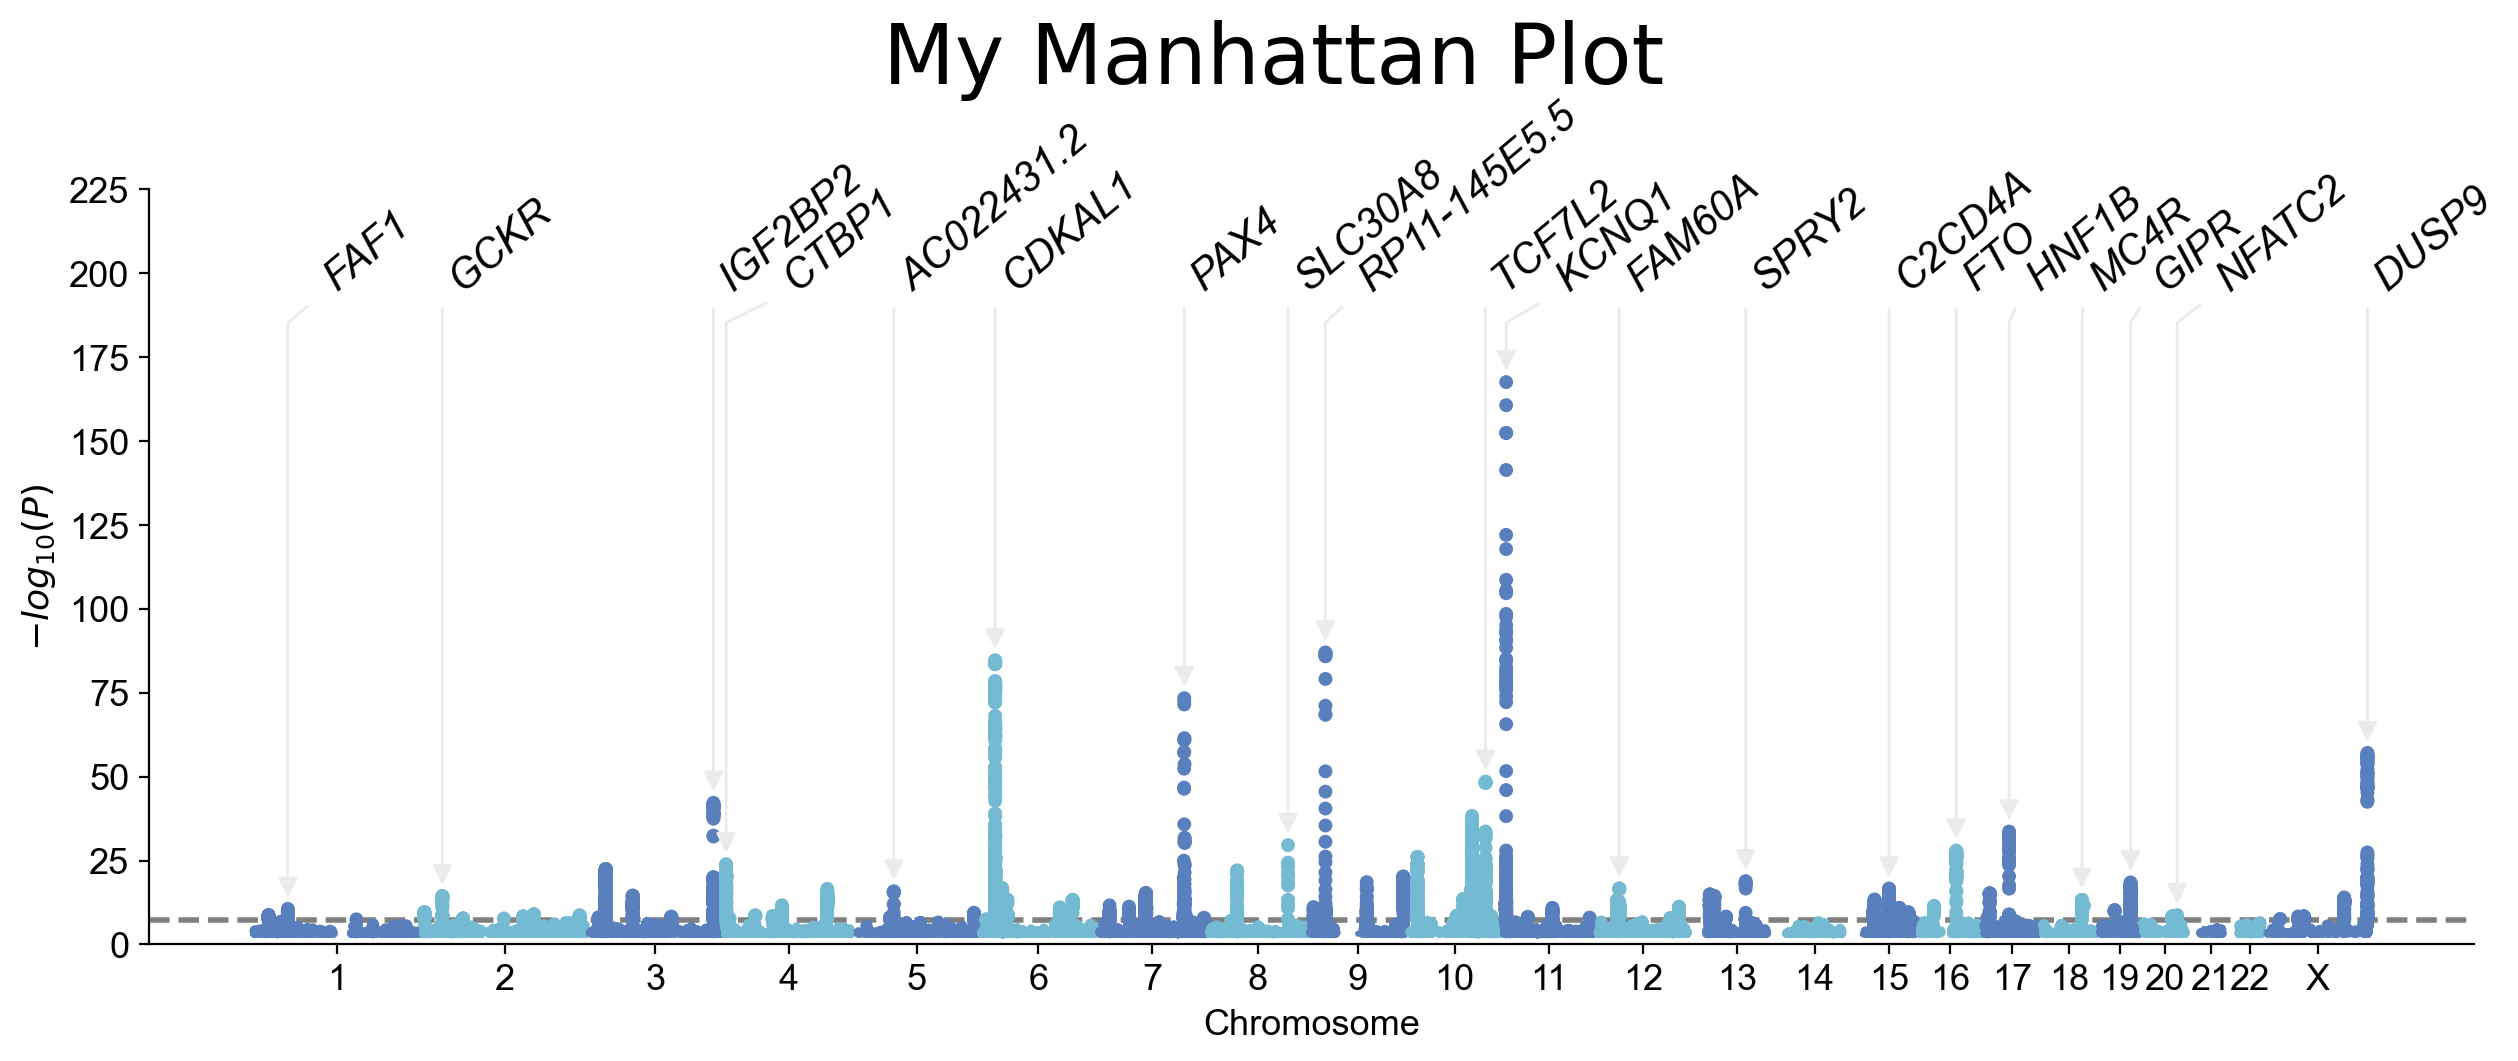

In [22]:
mysumstats.plot_mqq(skip=3,
          anno="GENENAME",
          title= "My Manhattan Plot",
          windowsizekb=1000000,
          fontsize =13,
          anno_fontsize = 15,
          title_fontsize = 30,
          marker_size=(5,25),
          mode= "m", 
          verbose=False,
          check=False
)

### Colors

- `colors`
- `cut_line_color`
- `sig_line_color`
- `highlight_color`
- `pinpoint_color`
- `maf_bin_colors`

(<Figure size 3000x1000 with 2 Axes>, <gwaslab.g_Log.Log at 0x7f6928adce20>)

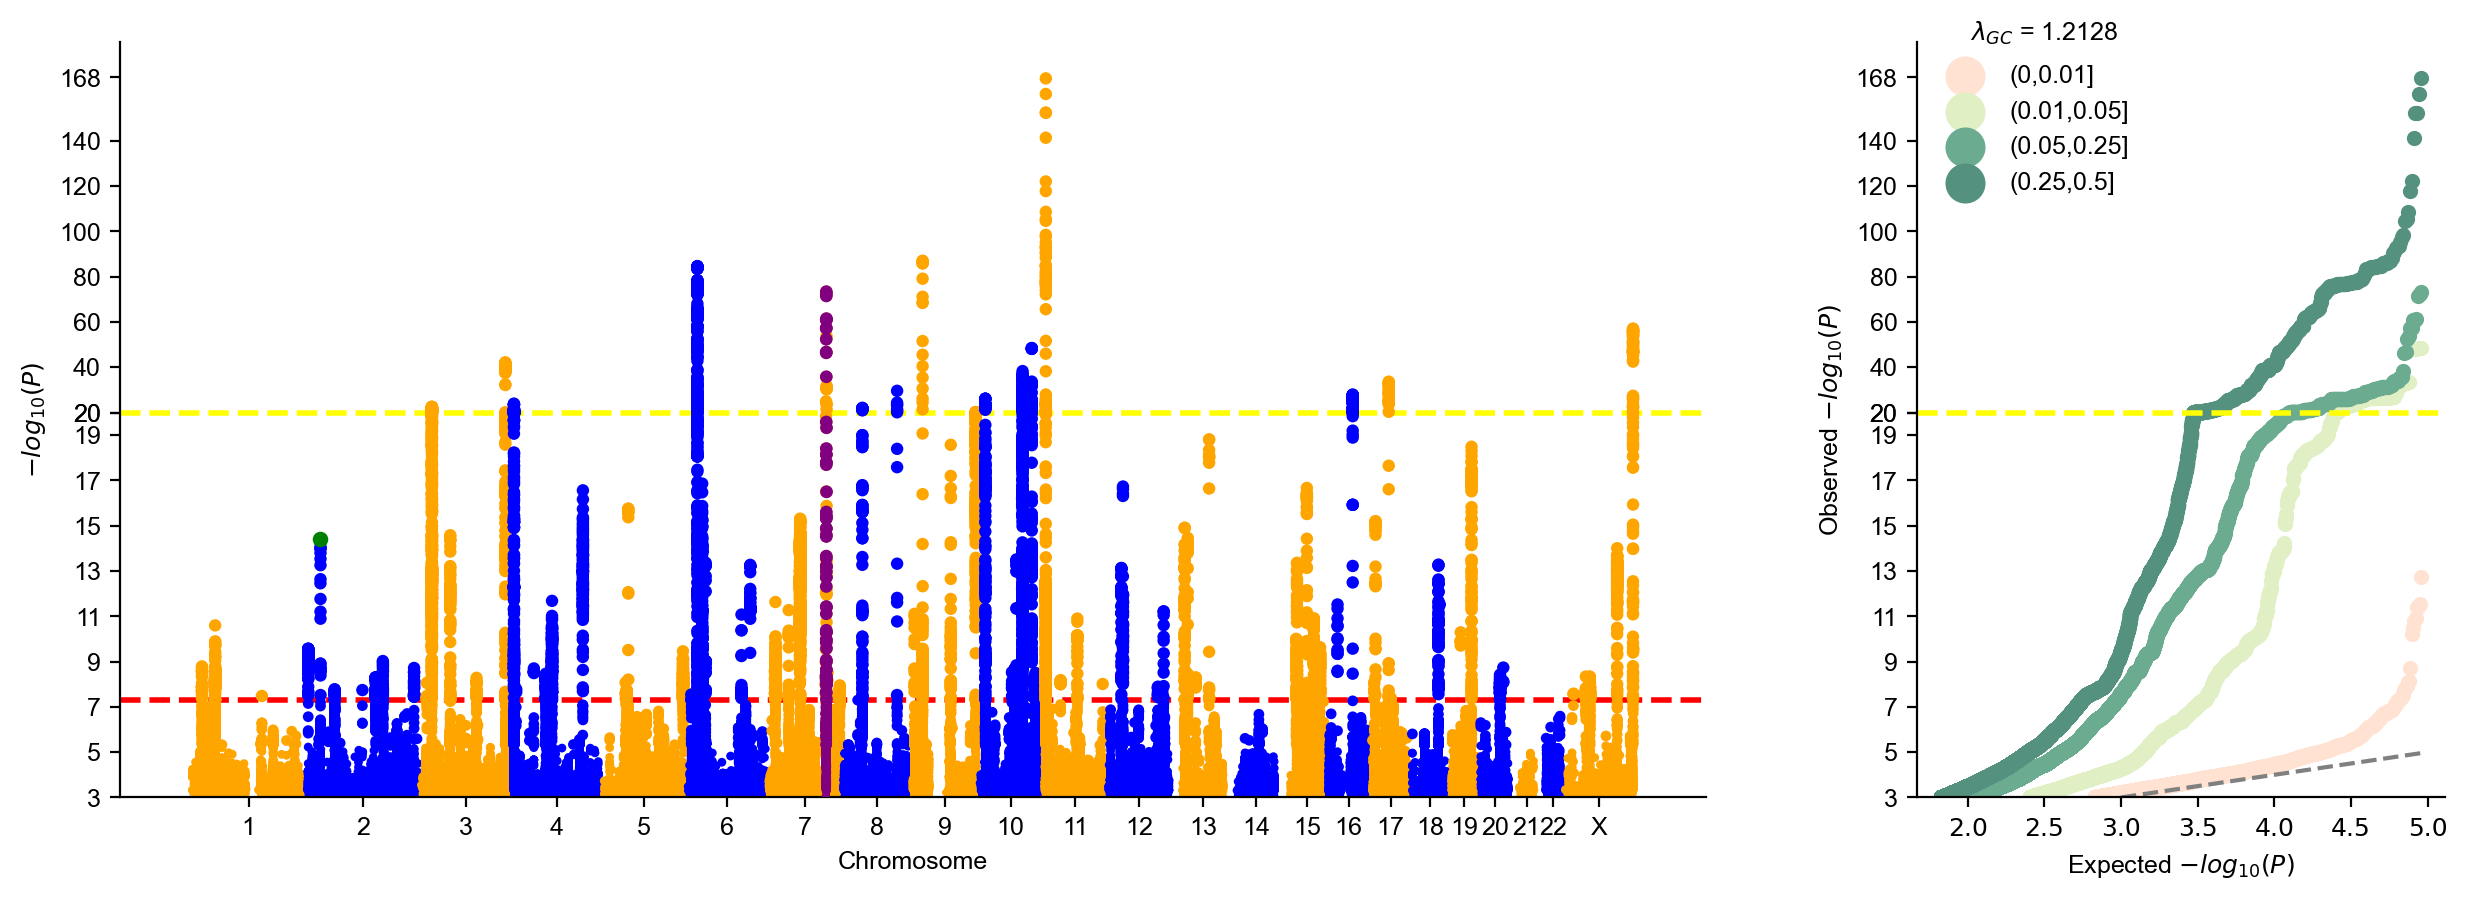

In [23]:
mysumstats.plot_mqq(skip=3,
          cut=20,
          stratified=True,
          highlight=["7:127253550_C_T"],
          pinpoint=["2:27734972_G_A"],
          colors=["orange","blue"],
          cut_line_color="yellow",
          sig_line_color="red",
          highlight_color="purple",
          pinpoint_color ="green",
          maf_bin_colors = ["#FFE2D1","#E1F0C4", "#6BAB90","#55917F"],
          check=False,verbose=False
)

### Save plots

Sat Feb  3 18:13:57 2024 Start to create MQQ plot...v3.4.38:
Sat Feb  3 18:13:57 2024  -Genomic coordinates version: 19...
Sat Feb  3 18:13:57 2024  -Genome-wide significance level to plot is set to 5e-08 ...
Sat Feb  3 18:13:57 2024  -Raw input contains 12557761 variants...
Sat Feb  3 18:13:57 2024  -MQQ plot layout mode is : mqq
Sat Feb  3 18:14:00 2024 Finished loading specified columns from the sumstats.
Sat Feb  3 18:14:00 2024 Start data conversion and sanity check:
Sat Feb  3 18:14:01 2024  -Removed 0 variants with nan in CHR or POS column ...
Sat Feb  3 18:14:26 2024  -Removed 0 variants with CHR <=0...
Sat Feb  3 18:14:27 2024  -Removed 0 variants with nan in EAF column ...
Sat Feb  3 18:14:27 2024  -Removed 0 variants with nan in P column ...
Sat Feb  3 18:14:28 2024  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Sat Feb  3 18:14:28 2024  -Sumstats P values are being converted to -log10(P)...
Sat Feb  3 18:14:29 2024  -Sanity chec

(<Figure size 3000x1000 with 2 Axes>, <gwaslab.g_Log.Log at 0x7f6928adce20>)

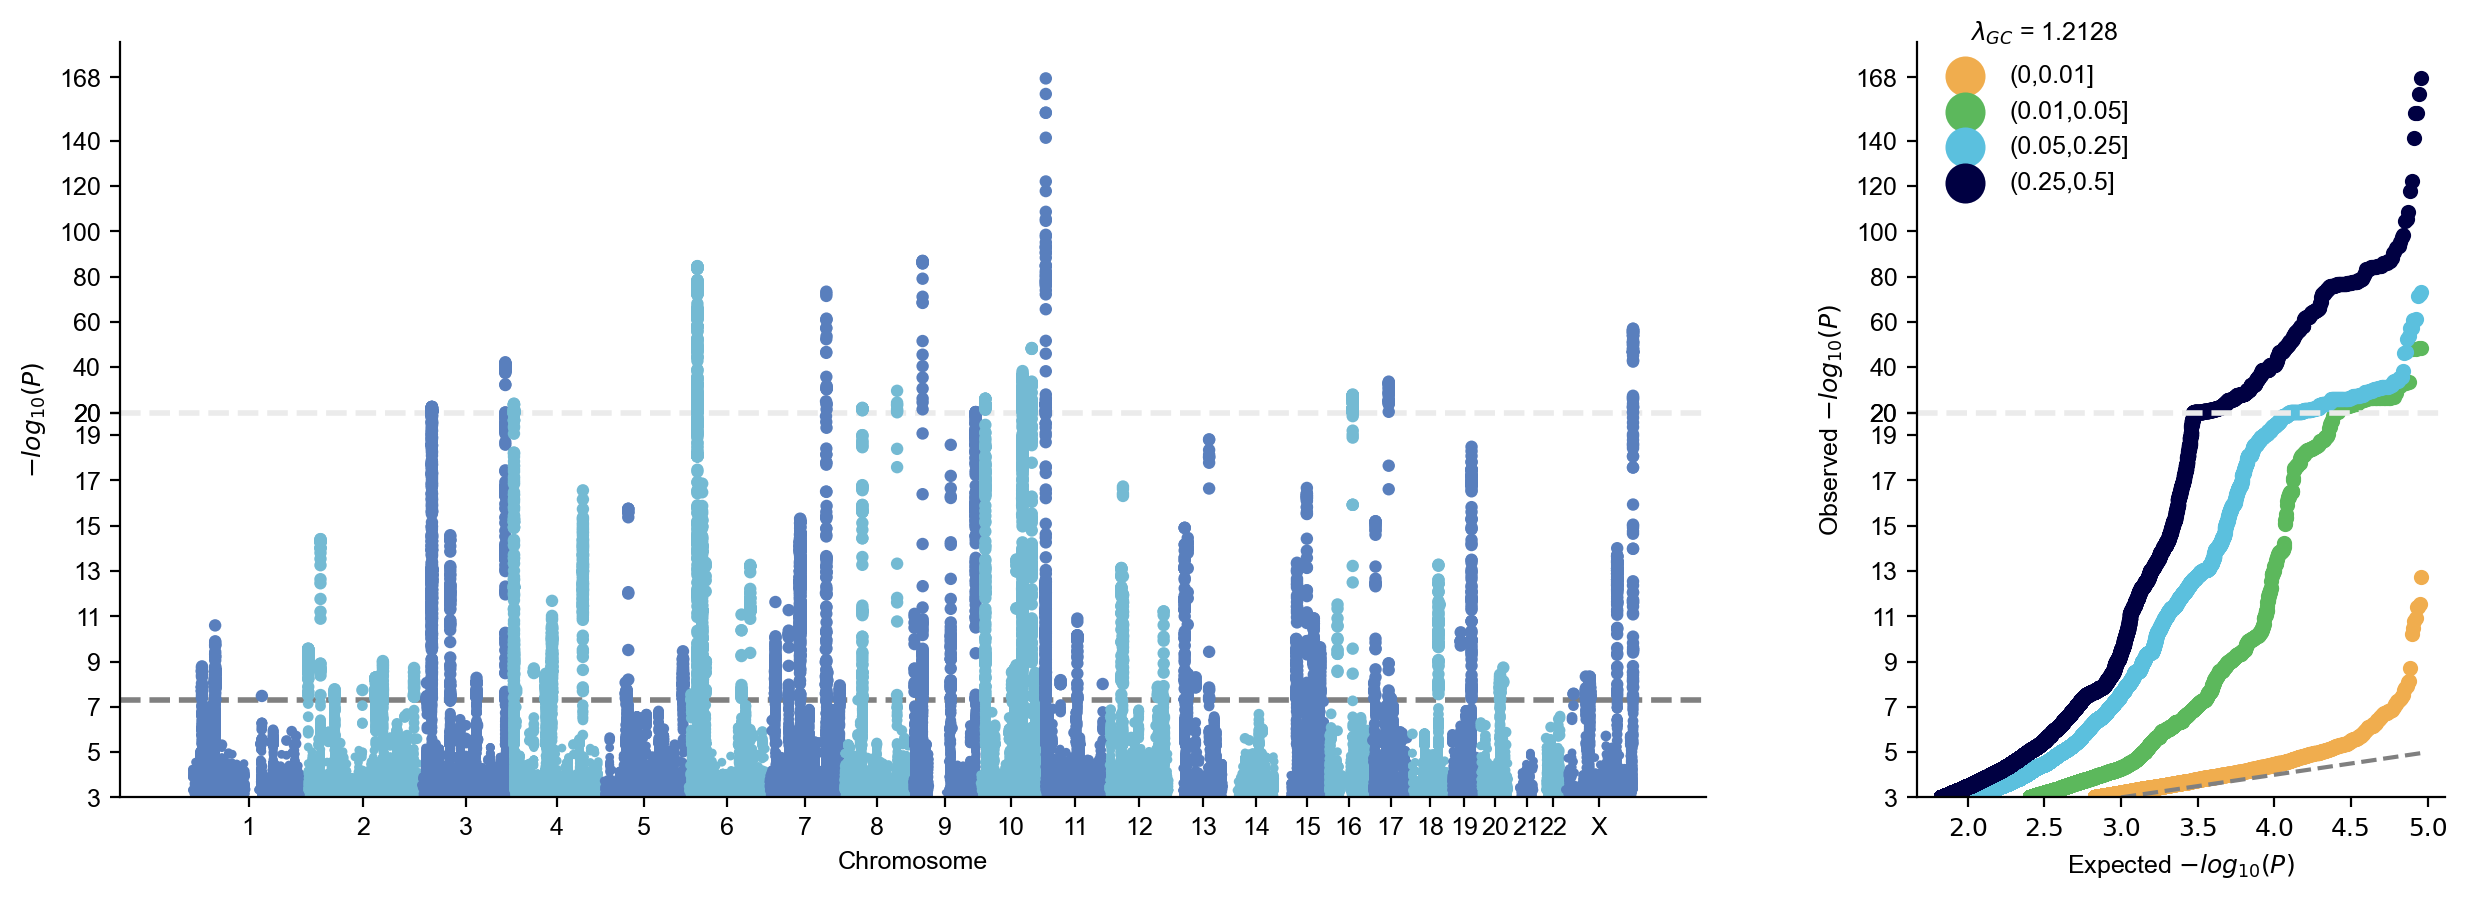

In [24]:
mysumstats.plot_mqq(skip=3,
                    cut=20, 
                    mode="mqq",
                    stratified=True,
                    save="my_maf_stratified_mqq_plot.png",
                    save_args={"dpi":300,"facecolor":"white"})

### Fig and Log object

plot_mqq will return a matplotlib figure object and a gwaslab log object

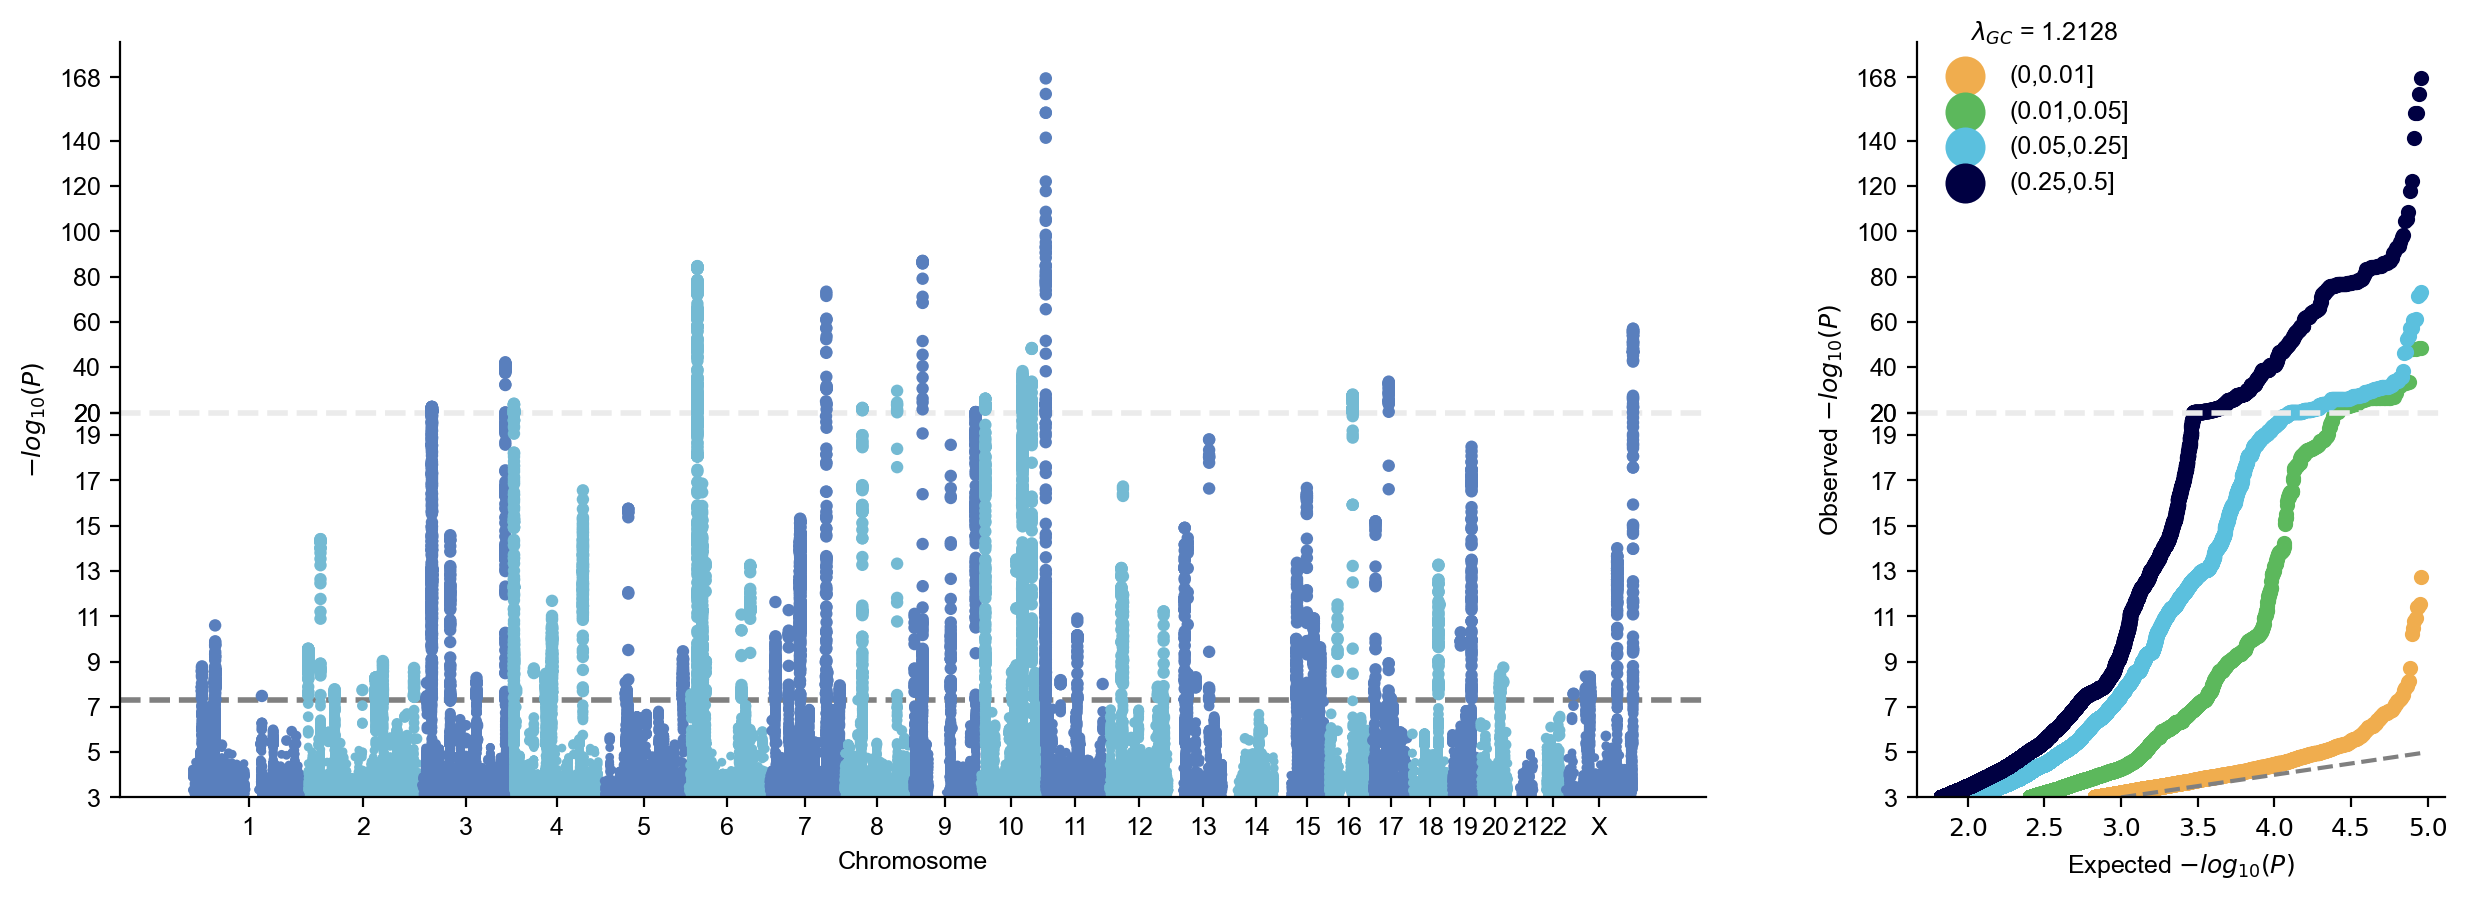

In [25]:
my_mqqplot,my_log = mysumstats.plot_mqq(skip=3,cut=20, mode="mqq",stratified=True,verbose=False)

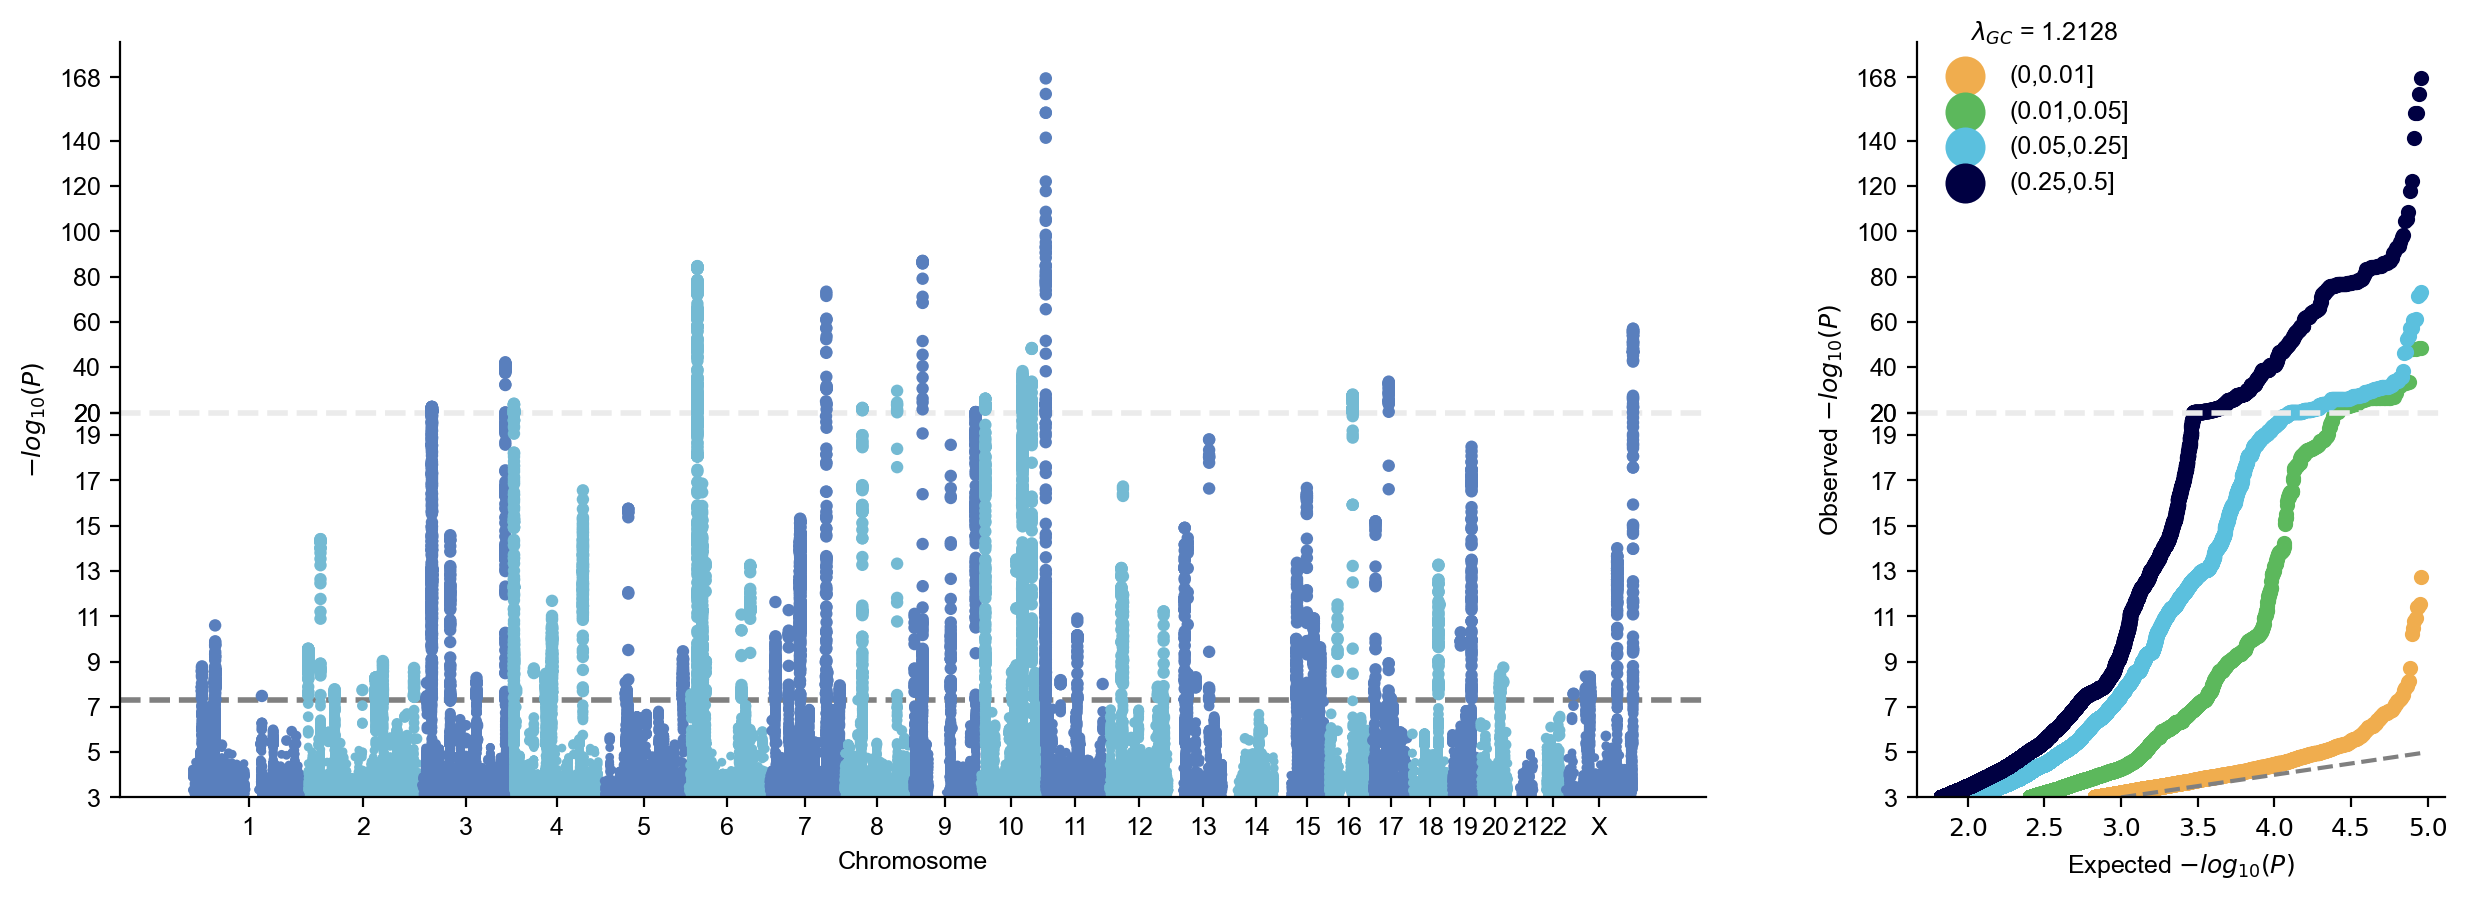

In [26]:
my_mqqplot

In [28]:
my_log

In [ ]:
my_log.show()